Importamos las herramientas con que vamos a trabajar

In [1232]:
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Vamos a relevar la codificación que tiene el archivo

In [1233]:
def get_encoding_type(csv_path):
    rawdata = open(csv_path, 'rb').read()
    result = chardet.detect(rawdata)
    return result.get('encoding')


In [1234]:
#data_location = "C:/Users/Administrador.000/Documents/DH/Contenidook/ds_blend_students_2020/Properati/properati.csv"
data_location = "../Properati/properati.csv"
data_orig = pd.read_csv(data_location, sep = ",",encoding='utf_8')
print(data_orig.shape)
data_orig.dtypes

(121220, 26)


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

## Evalúo registros duplicados

Veamos si existen registros duplicados en el `DataFrame` data considerando sólo las columnas **"property_type"**, **"place_name"**, **"price"**, **"currency"**, **"surface_total_in_m2"**, **"surface_covered_in_m2"**, marcando como no duplicado la primera ocurrencia de un registro.

NOTA: Se desprecia la columna **"description"**, siendo que aún se encuentran duplicados al tener en cuenta dicha olumna.

In [1235]:
# subset que utilizaré para eliminar registros duplicados
subset = ["property_type","place_name","price","currency","surface_total_in_m2","surface_covered_in_m2"]
mask_duplicated = data_orig.duplicated(subset, keep = 'first')

# subset considerando "description":
subset = ["property_type","place_name","price","currency","surface_total_in_m2","surface_covered_in_m2","description"]
mask_duplicated_with_description = data_orig.duplicated(subset, keep = 'first')


print('Cantidad de registros duplicados: '+str(mask_duplicated.sum()))
print('Cantidad de registros duplicados considerando" description": '+str(mask_duplicated_with_description.sum()))

duplicated_records = data_orig.loc[mask_duplicated]
duplicated_records.head(3).sort_values(by = 'place_name')

Cantidad de registros duplicados: 22432
Cantidad de registros duplicados considerando" description": 6555


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
84,84,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9327656,-60.6533854",-32.932766,-60.653385,NaN,NaN,NaN,NaN,55.0,55.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15bz0_ve...,Departamento en PB con cocina comedo...,2 Dormitorios. Güemes al 2400,https://thumbs4.properati.com/3/p47w...
101,101,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9359588621,-60.6691426017",-32.935959,-60.669143,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15d1n_ve...,Tucuman 3476Edificio PB y 4 pisos po...,Rosario - Tucuman 3400 - Venta Dptos...,https://thumbs4.properati.com/1/2fJF...
102,102,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9359588621,-60.6691426017",-32.935959,-60.669143,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15d1o_ve...,Tucuman 3476Edificio PB y 4 pisos po...,Rosario - Tucuman 3400 - Venta Dptos...,https://thumbs4.properati.com/3/Ugx8...


**OMITO LA ELIMINACIÓN DE REGISTROS "DUPLICADOS"**

Esto lo hablé con Fabían y acordamos que no es prudente eliminarlos, dado que es difícil encontrar un criterio que garantice la existencia de los duplicados.
Lo veremos más adelante en los gráficos.

In [1236]:
# Omito la eliminación de "supuestos duplicados":
#data_nodup = data_orig.drop_duplicates(subset, keep = "first")

data_nodup = data_orig

print(data_orig.shape)
print(data_nodup.shape)

# Vemos que no quedan registros duplicados para el subset definido 
#dup_mask = data_nodup.duplicated(subset, keep = "first")
#any(dup_mask)

(121220, 26)
(121220, 26)


## Análisis de la información - Desestimación de datos

Veamos la cantidad de nulos que hay en mi `DataFrame` original

In [1237]:
data_orig.isnull().sum()/data_orig.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

In [1238]:
print(data_nodup.shape)
data_nodup.head(3)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_ve...,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluU...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_ve...,Venta de departamento en décimo piso...,VENTA Depto 2 dorm. a estrenar 7 e/ ...,https://thumbs4.properati.com/7/ikpV...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_ve...,2 AMBIENTES 3ER PISO LATERAL LIVING ...,2 AMB 3ER PISO CON ASCENSOR APTO CRE...,https://thumbs4.properati.com/5/SXKr...


## Análisis para eliminar registros 

Veamos los registros que no que no tienen moneda en AR o US$

In [1239]:
data_nodup.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Veo qué pasa con **PEN**.
Se dropea?

In [1240]:
mask_PEN = data_nodup.currency == 'PEN'
print('Precios de PEN:\n'+str(data_nodup.loc[mask_PEN].price))
data_nodup.loc[mask_PEN]

Precios de PEN:
50387    380000.0
50388    950000.0
Name: price, dtype: float64


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e8z_ve...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::...,DUPLEX A LA VENTA | Liniers 1200 | T...,https://thumbs4.properati.com/9/N_Qr...
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e90_ve...,Ref.: 56Duplex en venta de 1 dormito...,DUPLEX A LA VENTA | Liniers 1200 | T...,https://thumbs4.properati.com/8/_cBX...


Veo qué pasa con **UYU**.
Se dropea?

In [1241]:
mask_UYU = data_nodup.currency == 'UYU'
print('Precios de UYU:\n'+str(data_nodup.loc[mask_UYU].price))
data_nodup.loc[mask_UYU]

Precios de UYU:
107390    650000000.0
Name: price, dtype: float64


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,NaN,650000000.0,UYU,4.054773e+08,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1by0s_ve...,"Casa con Calefacción central, Mendoz...",Casa - San Vicente,https://thumbs4.properati.com/2/pA0R...


Elimino los registros que no tienen moneda en AR o US$

In [1242]:
mask_AR_US = np.logical_or(data_nodup.currency == 'UYU', data_nodup.currency == 'PEN') 
print('Cantidad de elementos a eliminar: ', str(mask_AR_US.sum()))

# Identifico los índices que voy a eliminar
inds = data_nodup.loc[mask_AR_US].index
inds

Cantidad de elementos a eliminar:  3


Int64Index([50387, 50388, 107390], dtype='int64')

In [1243]:
data_nodup_dropped = data_nodup.drop(index = inds)
print("Filas en Registros limpios: "+str(data_nodup_dropped.shape[0]))
print("Filas en Registros anterior: "+str(data_nodup.shape[0]))
data_nodup_dropped.head()

Filas en Registros limpios: 121217
Filas en Registros anterior: 121220


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_ve...,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluU...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_ve...,Venta de departamento en décimo piso...,VENTA Depto 2 dorm. a estrenar 7 e/ ...,https://thumbs4.properati.com/7/ikpV...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_ve...,2 AMBIENTES 3ER PISO LATERAL LIVING ...,2 AMB 3ER PISO CON ASCENSOR APTO CRE...,https://thumbs4.properati.com/5/SXKr...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_ve...,PH 3 ambientes con patio. Hay 3 dept...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIf...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlánt...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_ve...,DEPARTAMENTO CON FANTÁSTICA ILUMINAC...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CEN...,https://thumbs4.properati.com/5/xrRq...


Armo un `DataFrama` **data** quedándome con las columnas de interés.

In [1244]:
subset = ['Unnamed: 0','operation','country_name','lat','lon','floor','expenses','properati_url','image_thumbnail']

data = data_nodup_dropped.drop(subset, axis = 1)
print(data.shape)
data.sample(3)

(121217, 17)


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
93646,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,NaN,NaN,NaN,NaN,NaN,70.0,70.0,NaN,NaN,NaN,Sergio Villella Inmobiliaria present...,Departamento - Centro
94996,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Capital Federal,3435874.0,"-34.6282098004,-58.4295155485",88632.0,USD,1563867.32,88632.0,30.0,25.0,2954.4,3545.28,NaN,Situado en un único lote de más de 3...,Departamento de treinta metros en Pa...
103428,apartment,Villa La Angostura,|Argentina|Neuquén|Villa La Angostura|,Neuquén,3832711.0,NaN,NaN,NaN,NaN,NaN,52.0,42.0,NaN,NaN,NaN,96 unidades exclusivas. Amenities de...,Departamento - La Villa


## Análisis de precios

Veamos cuestiones referido a los precios en AR o US$.

Lo primero para analizar es la tasa de conversión entre pesos y dólares, la cual viene dada por el factor de conversión 17.6445, no importa si el precio se define en $AR o USD. Con este argumento podrían eliminar algunos datos.

In [1245]:
# tasa de conversión
serie_price_aprox_local_currency = data.price_aprox_local_currency
serie_price_aprox_usd = data.price_aprox_usd

tasa_conversion = (serie_price_aprox_local_currency/serie_price_aprox_usd).round(4)
tasa_conversion.value_counts()

17.6445    100806
dtype: int64

In [1246]:
# Me fijo inconsistencia en los precios en AR y US$
mask_prices = data.price_aprox_usd >= data.price_aprox_local_currency
print("Cantidad de inconsistencias: ", mask_prices.sum())
data.loc[mask_prices]

Cantidad de inconsistencias:  1


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,"4.5458426,-75.67893099",0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR


In [1247]:
#Veo si hay algún dato rescatable
print(data.loc[mask_prices].title)
print(data.loc[mask_prices].description)

9761    SE VENDE CASA EN EL BARRIO EL LIMONAR
Name: title, dtype: object
9761    Casa en Venta de 2 dorm. en Armenia
Name: description, dtype: object


Dado que este registro tiene los datos de interés en **NaN** y no se puede extraer información de otros registros, decido eliminarlo.

In [1248]:
ind_prices = data.loc[mask_prices].index

# Elimino el registro
data = data.drop(index = ind_prices)
data.shape

(121216, 17)

Veo si **NO** tiene definido el precio pero **SÍ** el precio/m2.

Vemos que **NO** se da el caso.

In [1249]:
mask_prices = np.logical_and(data.price.isnull(), data.price_usd_per_m2.notnull())
mask_prices.sum()

0

In [1250]:
data.head(2)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La...,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso...,VENTA Depto 2 dorm. a estrenar 7 e/ ...


In [1251]:
# Evalúo para USD
mask_usd = data.currency == 'USD'
print(mask_usd.sum())
mask_prices_usd = data.loc[mask_usd].price.round(2) == data.loc[mask_usd].price_aprox_usd.round(2)
print(mask_prices_usd.sum())

87587
87587


Vemos que coincide la columna **price** con **price_aprox_usd** cuando **currency** es USD.

Veamos qué sucede cuando **price** es ARS:

In [1252]:
# Evalúo para ARS
mask_ars = data.currency == 'ARS'
print(mask_ars.sum())
mask_prices_ars = data.loc[mask_ars].price.round(2) == data.loc[mask_ars].price_aprox_local_currency.round(2)
print(mask_prices_ars.sum())
data.loc[mask_ars].head()

13219
0


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.942031,-60.7259192",460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,MEDNOZA AL 7600A UNA CUADRA DE CALLE...,WHITE 7637 - 2 DORMITORIOS CON PATIO...
32,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.4053736,-64.1562667",550000.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000,3.0,"EN VENTA, departamento ubicado en ba...",Departamento apto crédito! Barrio Pu...
37,house,Malagueño,|Argentina|Córdoba|Malagueño|,Córdoba,3845202.0,"-31.4373176491,-64.4580057347",1250000.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667,NaN,Nuevos ingreso:-VENTA-Villa San Nico...,Casa Venta Villa San Nicolas
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,3429886.0,"-27.3554665957,-55.9021115026",5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GA...",Oportunidad! Casa zona Bahía el Brete
97,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Capital Federal,3428113.0,"-34.6247504837,-58.3791482449",1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN,1.0,Torre de 15 pisos con amenities ubic...,VIVÍ CERCA DE TODO Av. 9 de Julio


Cómo vemos que **price** en ARS no cinciden, veamos si tienen relación con **price_aprox_usd**:

In [1253]:
# tasa de conversión
serie_price_ARS = data[mask_ars].price
serie_price_aprox_usd = data[mask_ars].price_aprox_usd

tasa_conversion = (serie_price_ARS/serie_price_aprox_usd).round(4)
tasa_conversion.value_counts()

17.8305    12857
17.1430      290
17.6340       54
17.7980        6
17.2040        4
17.5025        3
17.4040        2
17.4265        1
17.4670        1
17.4050        1
dtype: int64

Como vemos que predomina la tasa de cambio de 17.8305 entre el **price** en ARS y el **price_aprox_usd**, vamos a utilizar esta tasa para redefinir los precios en US$.

Vamos a definir una nueva columna **"price_USD"** y va a contener:
- Los valores de price cuando currency sea USD
- Los valores de price modificados por la tasa de cambio de 17.8305 cuando currency sea ARS

In [1254]:
data.loc[mask_usd,"price_USD"] = (data.loc[mask_usd,"price"]).round(0)
data.loc[mask_ars,"price_USD"] = (data.loc[mask_ars,"price"]/17.8305).round(0)

print("Cantidad de nulls en columna price_USD: ",data["price_USD"].isnull().sum())
print("Cantidad de nulls en columna price: ",data["price_USD"].isnull().sum())

Cantidad de nulls en columna price_USD:  20410
Cantidad de nulls en columna price:  20410


A partir de aquí sabemos que podemos eliminar las columnas **price**, **currency**, **price_aprox_local_currency**, **price_aprox_usd**, pero vamos a dejarlo para después porque podemos llegar a necesitarlas en el análisis de las superficies y precio/superficie.

## Análisis de Superficies

Veamos cuestiones relacionadas a los campos "surface_total_in_m2" y "surface_covered_in_m2".
VAmos a tratar de limpiar, emprolijar y reconstruir estos campos.

In [1255]:
data.isnull().sum()/data.shape[0]

property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
state_name                    0.000000
geonames_id                   0.154410
lat-lon                       0.425249
price                         0.168377
currency                      0.168377
price_aprox_local_currency    0.168377
price_aprox_usd               0.168377
surface_total_in_m2           0.324413
surface_covered_in_m2         0.164194
price_usd_per_m2              0.433928
price_per_m2                  0.276845
rooms                         0.609053
description                   0.000016
title                         0.000000
price_USD                     0.168377
dtype: float64

In [1256]:
# Acá me aseguro que ninguno de los dos campos tengan nulls:
mask_size_right_surfaces = data.surface_total_in_m2 >= data.surface_covered_in_m2
print('Cantidad de registros coherentes: ' + str(mask_size_right_surfaces.sum()))
data.loc[mask_size_right_surfaces].head(2)

Cantidad de registros coherentes: 73248


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING ...,2 AMB 3ER PISO CON ASCENSOR APTO CRE...,72000.0


In [1257]:
# Agrego los datos verificados en nuevas columnas:
data.loc[mask_size_right_surfaces,'superficie_TOTAL'] = data.loc[mask_size_right_surfaces,'surface_total_in_m2']
data.loc[mask_size_right_surfaces,'superficie_CUBIERTA'] = data.loc[mask_size_right_surfaces,'surface_covered_in_m2']
data.head(1)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0


In [1258]:
# Vamos a calcular la media y desvío estándar de la diferencia entre ambas sups:
resta_sups_right = (data.loc[mask_size_right_surfaces].surface_total_in_m2 - data.loc[mask_size_right_surfaces].surface_covered_in_m2)
mean_surfaces_right = resta_sups_right.mean().round(2)
stdv_surfaces_right = resta_sups_right.std().round(2)

print('MEAN de la diferencia de superficies: '+str(mean_surfaces_right))
print('STD de la diferencia de superficies: '+str(stdv_surfaces_right))

MEAN de la diferencia de superficies: 113.18
STD de la diferencia de superficies: 1653.62


In [1259]:
#from bokeh.plotting import figure, output_notebook, show
#from bokeh.models import HoverTool

#p = figure(plot_width=600, plot_height=400)
#p.circle(x=resta_sups_right.index, y=resta_sups_right.values, size=8)

#hover = HoverTool(tooltips=[("index", "$index"), ("(x,y)", "($x, $y)")])

#p.add_tools(hover)
#output_notebook()
#show(p)

In [1260]:
#data.loc[mask_size_right_surfaces].iloc[5975]

Veamos cuando solo tenemos una de las dos superficies definidas:

In [1261]:
mask_surface_total_in_m2_nulls = data.surface_total_in_m2.isnull()
mask_surface_covered_in_m2_nulls = data.surface_covered_in_m2.isnull()

In [1262]:
# Tengo TOTAL pero no tengo CUBIERTA
mask_surface_total = np.logical_and(np.logical_not(mask_surface_total_in_m2_nulls),mask_surface_covered_in_m2_nulls)
print('Cantidad de casos: ' + str(mask_surface_total.sum()))
data.loc[mask_surface_total,'superficie_TOTAL'] = data.loc[mask_surface_total,'surface_total_in_m2']
data.loc[mask_surface_total].head(1)

Cantidad de casos: 7538


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,3433657.0,"-33.0140714,-58.519828",NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,"Casa en el perímetro del barrio 338,...",Casa Barrio 338. Sobre calle 3 de ca...,NaN,53.0,NaN


In [1263]:
# Tengo CUBIERTA pero no tengo TOTAL
mask_surface_covered = np.logical_and(mask_surface_total_in_m2_nulls,np.logical_not(mask_surface_covered_in_m2_nulls))
print('Cantidad de casos: ' + str(mask_surface_covered.sum()))
data.loc[mask_surface_covered,'superficie_CUBIERTA'] = data.loc[mask_surface_covered,'surface_covered_in_m2']
data.loc[mask_surface_covered].head(1)

Cantidad de casos: 26959


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
68,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlánt...,Buenos Aires Costa Atlántica,3430863.0,"-38.034794,-57.5416872",235000.0,USD,4146457.5,235000.0,NaN,72.0,NaN,3263.888889,2.0,"Cocina integrada con barra , horno ...",EXCELENTE DEPARTAMENTO CON VISTA AL ...,235000.0,NaN,72.0


## Veamos qué pasa con los casos donde la sup cubierta es mayor que sup total:

In [1264]:
mask_size_surfaces = data.surface_total_in_m2 < data.surface_covered_in_m2
print('Cantidad de inconsistencias en superficie: ' + str(mask_size_surfaces.sum()))
data.loc[mask_size_surfaces].head(2)

Cantidad de inconsistencias en superficie: 1106


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,3429886.0,"-27.3554665957,-55.9021115026",5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GA...",Oportunidad! Casa zona Bahía el Brete,308460.0,NaN,NaN
177,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,3832791.0,"-31.4200736,-64.4947113",470000.0,USD,8292915.00,470000.00,420.0,450.0,1119.047619,1044.444444,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,...",SE VENDE VIVIENDA+LOCALES COMERCIALE...,470000.0,NaN,NaN


In [1265]:
# Vamos a calcular la media y desvío estándar de la diferencia entre ambas sups:
resta_sups_wrong = (data.loc[mask_size_surfaces].surface_covered_in_m2 - data.loc[mask_size_surfaces].surface_total_in_m2)
mean_surfaces_wrong = resta_sups_wrong.mean().round(2)
stdv_surfaces_wrong = resta_sups_wrong.std().round(2)

print('MEAN de la diferencia de superficies: '+str(mean_surfaces_wrong))
print('STD de la diferencia de superficies: '+str(stdv_surfaces_wrong))

MEAN de la diferencia de superficies: 318.33
STD de la diferencia de superficies: 2463.4


In [1266]:
resta_sups_wrong.shape[0]

1106

In [1267]:
mask_resta_sups_wrong_acceptable = resta_sups_wrong < mean_surfaces_right
mask_resta_sups_wrong_acceptable.shape[0]

1106

Como la mayoría de la diferencia de estas superficies está por debajo de la media de las que asumo que están bien, entonces invierto los valores y los cargo en las nuevas columnas.

In [1268]:
# NO ME FUNCIONA!!!
# me quedan en NaN las nuevas columnas

# Agrego los datos verificados en nuevas columnas:
#data.loc[mask_size_surfaces,'superficie_TOTAL'].loc[mask_resta_sups_wrong_acceptable] = data.loc[mask_size_surfaces,'surface_covered_in_m2'].loc[mask_resta_sups_wrong_acceptable]
#data.loc[mask_size_surfaces.loc[mask_resta_sups_wrong_acceptable],'superficie_CUBIERTA'] = data.loc[mask_size_surfaces,'surface_total_in_m2']
data.loc[mask_size_surfaces].loc[mask_resta_sups_wrong_acceptable].head(1)
#mask_size_surfaces

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
177,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,3832791.0,"-31.4200736,-64.4947113",470000.0,USD,8292915.0,470000.0,420.0,450.0,1119.047619,1044.444444,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,...",SE VENDE VIVIENDA+LOCALES COMERCIALE...,470000.0,NaN,NaN


Vemos que la media y std son bastante mayores a los valores consistentes. 

Vamos a hacer algunos gráficos para identificar visualmente qué indices de mi `Serie` **diferencia_surface** tiene diferencias entre superficie "grandes".

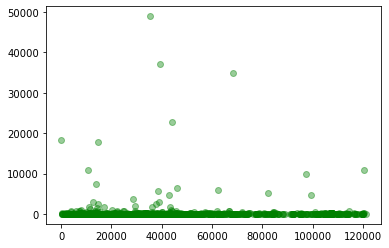

In [1269]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(resta_sups_wrong.index, resta_sups_wrong.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)


In [1270]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

p = figure(plot_width=600, plot_height=400)
p.circle(x=resta_sups_wrong.index, y=resta_sups_wrong.values, size=8)

hover = HoverTool(tooltips=[("index", "$index"), ("(x,y)", "($x, $y)")])

p.add_tools(hover)
output_notebook()
show(p)

Loading BokehJS ...

In [1271]:
# Para leer mejor los datos:
pd.options.display.max_colwidth = 1000

# [0,154,465,502, 608,371,837,897,890,1090,814]
watching = [0,154,465,502, 608,371]
print(data.loc[mask_size_surfaces].iloc[watching].description)

78                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   S/AVDA   COSTANERA ,  NUEVA  ZONA GASTRONOMICA  FRENTE AL BALNEARIO EL BRETE. IDEAL VIVIENDA  FLIAR. MAS EMPRENDIMIENTO  COMERCIAL  APTO RESTAURANTE Y PARRILLA. PLANTA ALTA 3 DORM (1 EN SUITE)  PATIO FRENTE Y FONDO, $  5. 500.000.- SE RECIBE  INMUEBLE A CUENTA. TERRENO 24.14 x 10.78. CUENTA CON BAÑO PARA DISCAPACITADO, Y HABILITACION PARA COMERCIO GASTR

In [1272]:
# Vuelvoa configurar el valor default:
pd.options.display.max_colwidth = 40
data.loc[mask_size_surfaces].iloc[watching]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,3429886.0,"-27.3554665957,-55.9021115026",5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,5.0,"S/AVDA COSTANERA , NUEVA ZONA GA...",Oportunidad! Casa zona Bahía el Brete,308460.0,NaN,NaN
12559,house,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,3427504.0,NaN,620000.0,USD,10939590.00,620000.00,270.0,301.0,2296.296296,2059.800664,NaN,UBICACION:Excelente ubicaciÃ³n en zo...,"Casa 270m² con Teléfono en Madero, D...",620000.0,NaN,NaN
34455,apartment,Villa Gesell,|Argentina|Buenos Aires Costa Atlánt...,Buenos Aires Costa Atlántica,3427431.0,"-37.2991548,-57.0004331",130000.0,USD,2293785.00,130000.00,55.0,66.0,2363.636364,1969.696970,2.0,Construido sobre la primer linea de ...,Venta Dpto Frente al mar en Comple...,130000.0,NaN,NaN
37354,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,400000.0,USD,7057800.00,400000.00,226.0,230.0,1769.911504,1739.130435,NaN,Chalet en muy buen estado. P.B.: Hal...,"Casa 226m² con 3 Plantas en Edison, ...",400000.0,NaN,NaN
45505,house,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lo...,Bs.As. G.B.A. Zona Sur,3436152.0,"-34.7489788,-58.3816503",170000.0,USD,2999565.00,170000.00,165.0,223.0,1030.303030,762.331839,NaN,CODIGO: 031 ubicado en: CAPDEVILLA 7...,CHALET EN DOS PLANTAS EN BANFIELD,170000.0,NaN,NaN
28456,apartment,Canning,|Argentina|Bs.As. G.B.A. Zona Sur|Es...,Bs.As. G.B.A. Zona Sur,3435719.0,"-34.8853928566,-58.5126642791",117100.0,USD,2066170.95,117100.00,14.0,46.0,8364.285714,2545.652174,NaN,CODIGO: ubicado en: Espacio las Cav...,Departamento en venta en Espacio Las...,117100.0,NaN,NaN


Vemos que se podría sacar información de `description`, pero queda fuera del alacance de este trabajo.

## Análisis de "Precio por Superficie" en USD/m2

Vamos a ver qué relación hay entre las columas de precio, superficies y precios por superfice.

In [1273]:
data.head(1)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0


Pareciera que:
- "price_usd_per_m2" es "price" / "surface_total_in_m2"
- "price_per_m2" es "price" / "surface_covered_in_m2"

Vamos a verificarlo.

In [1274]:
# precios del m2 estimados:
serie_price_usd_per_m2_estimada = (data["price"] / data["surface_total_in_m2"]).round(2)
serie_price_per_m2_estimada = (data["price"] / data["surface_covered_in_m2"]).round(2)

print('Datos: '+str(serie_price_usd_per_m2_estimada.notnull().sum()))
print('Datos: '+str(serie_price_per_m2_estimada.notnull().sum()))

Datos: 68866
Datos: 87660


In [1275]:
mask_usd = data["currency"] == 'USD'

#Redefino mi serie en base a la moneda:
serie_price_usd_per_m2_estimada.loc[mask_usd] = (data.loc[mask_usd,"price"] / data.loc[mask_usd,"surface_total_in_m2"]).round(2)
serie_price_usd_per_m2_estimada.loc[np.logical_not(mask_usd)] = (data.loc[np.logical_not(mask_usd),"price"] / data.loc[np.logical_not(mask_usd),"surface_total_in_m2"]/17.8305).round(2)

In [1276]:
# Calculo la relación para la serie:
dif_price_usd_per_m2_estimada = (serie_price_usd_per_m2_estimada / data["price_usd_per_m2"].round(2))
dif_price_usd_per_m2_estimada.max()

1.0000168248199743

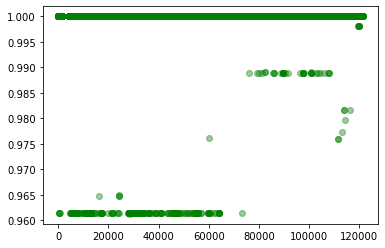

In [1277]:
# Hago el gráfico de la primera serie:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(dif_price_usd_per_m2_estimada.index, dif_price_usd_per_m2_estimada.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

In [1278]:
# Calculo la relación para la otra serie:
dif_price_per_m2_estimada = serie_price_per_m2_estimada / data["price_per_m2"].round(2)
dif_price_per_m2_estimada.min()

1.0

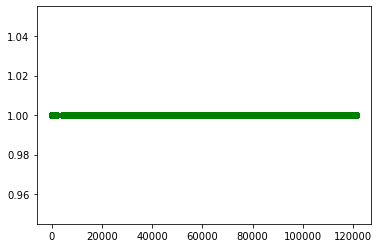

In [1279]:
# Hago el gráfico de la segunda serie:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(dif_price_per_m2_estimada.index, dif_price_per_m2_estimada.values, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

Entonces:
- Para el caso de "price_per_m2": se divide la columna ""price", sin importar las unidades, con la columna "surface_covered_in_m2".
- Para el caso de "price_usd_per_m2": se divide la columna ""price", corregido por currency, con la columna "surface_total_in_m2".

Vamos a generar una nueva columna con los precios en dolares dividido la superficie total y los precios en dolares dividido la superficie cubierta. A diferencia de las originales, estas sí serán representativas: todas en dolares y teniendo en cuenta el tipo de superficie correcto, usando las nuevas columnas de datos.

In [1280]:
data['precio_por_superficie_TOTAL'] = data['price_USD']/data['superficie_TOTAL']
data['precio_por_superficie_CUBIERTA'] = data['price_USD']/data['superficie_CUBIERTA']

Vemos con cuantos nulls y tamaño quedó nuestro DF

In [1281]:
print(data.isnull().sum()/data.shape[0])
print(data.shape[0])

property_type                     0.000000
place_name                        0.000190
place_with_parent_names           0.000000
state_name                        0.000000
geonames_id                       0.154410
lat-lon                           0.425249
price                             0.168377
currency                          0.168377
price_aprox_local_currency        0.168377
price_aprox_usd                   0.168377
surface_total_in_m2               0.324413
surface_covered_in_m2             0.164194
price_usd_per_m2                  0.433928
price_per_m2                      0.276845
rooms                             0.609053
description                       0.000016
title                             0.000000
price_USD                         0.168377
superficie_TOTAL                  0.333537
superficie_CUBIERTA               0.173319
precio_por_superficie_TOTAL       0.439934
precio_por_superficie_CUBIERTA    0.284888
dtype: float64
121216


Veamos si hay registros con superficies definidas pero no con datos de precios y viceversa.

In [1282]:
mask_prices = data.price_USD.isnull()
mask_surface_total = data.superficie_TOTAL.isnull()
mask_surface_cubierta = data.superficie_CUBIERTA.isnull()

print("Datos con precios pero sin superficie total: " + str(np.logical_and(np.logical_not(mask_prices),mask_surface_total).sum()))
print("Datos con precios pero sin superficie cubierta: " + str(np.logical_and(np.logical_not(mask_prices),mask_surface_cubierta).sum()))
print("Datos sin precios pero con superficie total: " + str(np.logical_and(np.logical_not(mask_surface_total),mask_prices).sum()))
print("Datos sin precios pero con superficie cubierta: " + str(np.logical_and(np.logical_not(mask_surface_cubierta),mask_prices).sum()))
print("Datos SIN precios: " + str(mask_prices.sum()))

Datos con precios pero sin superficie total: 32917
Datos con precios pero sin superficie cubierta: 14123
Datos sin precios pero con superficie total: 12897
Datos sin precios pero con superficie cubierta: 13524
Datos SIN precios: 20410


Elimino registros que NO tienen precio.

In [1283]:
# Busco los índices:
mask_NaN_prices = np.logical_and(np.logical_and(data.price.isnull(),data.currency.isnull()),np.logical_and(data.price_aprox_local_currency.isnull(),data.price_aprox_usd.isnull()))
print('Cantidad de elementos a eliminar:' + str(mask_NaN_prices.sum()))
inds_prices = data.loc[mask_NaN_prices].index
inds_prices

Cantidad de elementos a eliminar:20410


Int64Index([     5,     20,     41,     62,     67,     76,     83,     84,
                85,    100,
            ...
            121127, 121129, 121142, 121207, 121208, 121210, 121211, 121212,
            121213, 121214],
           dtype='int64', length=20410)

In [1284]:
data_clean_prices = data.drop(index = inds_prices)
                           
print(data.shape[0])
print(data_clean_prices.shape[0])

121216
100806


Elimino registros que NO tienen NINGÚN dato de superficies: o son NaN o 0.0 o sus combinaciones, ambas al mismo tiempo.
Puedo tener dato definido en la total, o en la cubierta o en los dos.

In [1285]:
mask_NaN_ceros_surfaces = np.logical_and(np.logical_or(data_clean_prices.superficie_TOTAL.isnull(), data_clean_prices.superficie_TOTAL == 0), np.logical_or(data_clean_prices.superficie_CUBIERTA.isnull(), data_clean_prices.superficie_CUBIERTA == 0))
                                
print('Cantidad de elementos a eliminar:' + str(mask_NaN_ceros_surfaces.sum()))
inds_surfaces = data_clean_prices.loc[mask_NaN_ceros_surfaces].index
inds_surfaces

Cantidad de elementos a eliminar:8858


Int64Index([     1,      3,      9,     11,     65,     70,     71,     72,
                78,     88,
            ...
            120979, 121055, 121062, 121069, 121070, 121079, 121101, 121133,
            121134, 121144],
           dtype='int64', length=8858)

In [1286]:
print("Antes de la limpieza: " + str(data_clean_prices.shape[0]))

data_clean_prices_sups = data_clean_prices.drop(index = inds_surfaces)
                           
print("Después de la limpieza: " + str(data_clean_prices_sups.shape[0]))

Antes de la limpieza: 100806
Después de la limpieza: 91948


In [1287]:
print(data_clean_prices_sups.isnull().sum()/data_clean_prices_sups.shape[0])
print(data_clean_prices_sups.shape[0])

property_type                     0.000000
place_name                        0.000250
place_with_parent_names           0.000000
state_name                        0.000000
geonames_id                       0.170227
lat-lon                           0.416790
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.264367
surface_covered_in_m2             0.057261
price_usd_per_m2                  0.264367
price_per_m2                      0.057282
rooms                             0.594303
description                       0.000011
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.264367
superficie_CUBIERTA               0.057261
precio_por_superficie_TOTAL       0.264367
precio_por_superficie_CUBIERTA    0.057261
dtype: float64
91948


In [1288]:
mask = data_clean_prices_sups.precio_por_superficie_TOTAL == 0
mask.sum()
data_clean_prices_sups.loc[mask]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA


## Imputación de superficies faltantes

Luego de la eliminar los registros que no cuentan con ningún dato de precios ni de superficies entre sus columnas principales -recordemos que NO se relevan dichos datos de las columnas `description` ni de `title`-, nos quedamos con algunos registros que tienen definido el precio y alguna de las dos superficies.

Del análisis vemos que tenemos muchos más datos faltantes en la columna `superficie_TOTAL` que en la `superficie_CUBIERTA`.

Vamos a utilizar el dato de una de las columnas para rellenar el dato de superficie faltante.
Esta decisión conlleva a una distorón de datos que veremos a continuación.

In [1289]:
# configuro para poder copiar sin warnings
pd.set_option('mode.chained_assignment', None)

In [1290]:
data_clean = data_clean_prices_sups.copy()

In [1291]:
# si es null o cero lo imputo con el valor de la superficie CUBIERTA
mask_sup_total_nulls = np.logical_or(data_clean_prices_sups.superficie_TOTAL.isnull(), data_clean_prices_sups.superficie_TOTAL == 0)

# Imputo el dato:
data_clean.superficie_TOTAL.loc[mask_sup_total_nulls] = data_clean_prices_sups.superficie_CUBIERTA.loc[mask_sup_total_nulls]

In [1292]:
# si es null o cero lo imputo con el valor de la superficie TOTAL
mask_sup_cubierta_nulls = np.logical_or(data_clean_prices_sups.superficie_CUBIERTA.isnull(), data_clean_prices_sups.superficie_CUBIERTA == 0)

# Imputo el dato:
data_clean.superficie_CUBIERTA.loc[mask_sup_cubierta_nulls] = data_clean_prices_sups.superficie_TOTAL.loc[mask_sup_cubierta_nulls]

In [1293]:
# reseteo configuración para poder copiar sin warnings
pd.reset_option('mode.chained_assignment')

In [1294]:
print("Superfie TOTAL antes vs después de la imputación:")
print(str(data_clean_prices_sups.superficie_TOTAL.describe().round(2)) + '\n\n\n' + str(data_clean.superficie_TOTAL.describe().round(2)))

Superfie TOTAL antes vs después de la imputación:
count     67640.00
mean        224.10
std        1771.81
min          10.00
25%          50.00
50%          82.00
75%         200.00
max      200000.00
Name: superficie_TOTAL, dtype: float64


count     91948.00
mean        201.77
std        1650.18
min           1.00
25%          49.00
50%          80.00
75%         185.00
max      200000.00
Name: superficie_TOTAL, dtype: float64


In [1295]:
print("Superfie CUBIERTA antes vs después de la imputación:")
print(str(data_clean_prices_sups.superficie_CUBIERTA.describe().round(2)) + '\n\n\n' + str(data_clean.superficie_CUBIERTA.describe().round(2)))

Superfie CUBIERTA antes vs después de la imputación:
count     86683.00
mean        125.82
std         705.43
min           0.00
25%          45.00
50%          73.00
75%         150.00
max      187000.00
Name: superficie_CUBIERTA, dtype: float64


count     91948.00
mean        131.96
std         971.82
min           1.00
25%          45.00
50%          72.00
75%         150.00
max      200000.00
Name: superficie_CUBIERTA, dtype: float64


In [1296]:
print(data_clean.isnull().sum()/data_clean.shape[0])
print(data_clean.shape[0])

property_type                     0.000000
place_name                        0.000250
place_with_parent_names           0.000000
state_name                        0.000000
geonames_id                       0.170227
lat-lon                           0.416790
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.264367
surface_covered_in_m2             0.057261
price_usd_per_m2                  0.264367
price_per_m2                      0.057282
rooms                             0.594303
description                       0.000011
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.000000
superficie_CUBIERTA               0.000000
precio_por_superficie_TOTAL       0.264367
precio_por_superficie_CUBIERTA    0.057261
dtype: float64
91948


Naturalmente, con esta imputación, la media de la `superficie_TOTAL` sube y para la `superficie_CUBIERTA` baja.

Lo mismo sucede con los desvíos.

En el caso de `superficie_CUBIERTA` se modifica el **max** valor pero luego se tomará alguna decisión analizando los outliers.

**Termino de completar los datos de precio por superfice.**

In [1297]:
data_clean.isnull().sum()/data_clean.shape[0]

property_type                     0.000000
place_name                        0.000250
place_with_parent_names           0.000000
state_name                        0.000000
geonames_id                       0.170227
lat-lon                           0.416790
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.264367
surface_covered_in_m2             0.057261
price_usd_per_m2                  0.264367
price_per_m2                      0.057282
rooms                             0.594303
description                       0.000011
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.000000
superficie_CUBIERTA               0.000000
precio_por_superficie_TOTAL       0.264367
precio_por_superficie_CUBIERTA    0.057261
dtype: float64

In [1298]:
# configuro para poder copiar sin warnings
pd.set_option('mode.chained_assignment', None)

In [1299]:
data_clean.precio_por_superficie_TOTAL = data_clean.price_USD/data_clean.superficie_TOTAL
data_clean.precio_por_superficie_CUBIERTA = data_clean.price_USD/data_clean.superficie_CUBIERTA

In [1300]:
# configuro para poder copiar sin warnings
pd.reset_option('mode.chained_assignment')

In [1301]:
data_clean.isnull().sum()/data_clean.shape[0]

property_type                     0.000000
place_name                        0.000250
place_with_parent_names           0.000000
state_name                        0.000000
geonames_id                       0.170227
lat-lon                           0.416790
price                             0.000000
currency                          0.000000
price_aprox_local_currency        0.000000
price_aprox_usd                   0.000000
surface_total_in_m2               0.264367
surface_covered_in_m2             0.057261
price_usd_per_m2                  0.264367
price_per_m2                      0.057282
rooms                             0.594303
description                       0.000011
title                             0.000000
price_USD                         0.000000
superficie_TOTAL                  0.000000
superficie_CUBIERTA               0.000000
precio_por_superficie_TOTAL       0.000000
precio_por_superficie_CUBIERTA    0.000000
dtype: float64

## Análisis de outliers

Vemoas ver la distribución de Precios en dólares. Cada 1 en X son 10Millones de dólares


In [1302]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

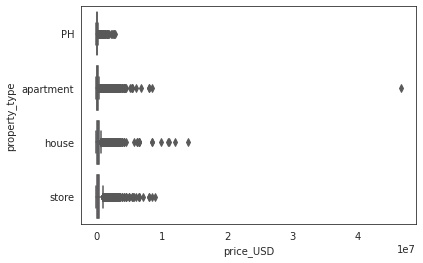

In [1303]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=data_clean)

Sacándole el valos de 46M se lee mejor el gráfico

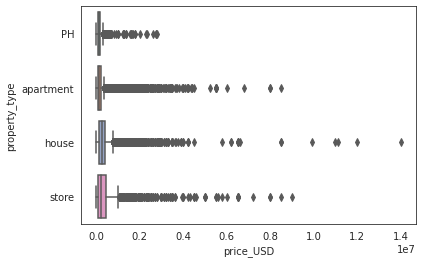

In [1304]:
menos20Millones_mask=data_clean['price_USD']<20000000
menos20Millones=data_clean.loc[menos20Millones_mask,:]
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=menos20Millones)

In [1305]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return (lower_bound,upper_bound)

**Analicemos los Outliers del precio**

In [1306]:
lower_bound,upper_bound=detect_outlier(data_clean['price_USD'])
lower_bound, upper_bound

(-180772.5, 543103.5)

Veamos cuántos datos quedan por encima del límite: 

In [1307]:
upper_bound_mask = data_clean['price_USD']>=upper_bound
mayor_upper_bound = data_clean.loc[upper_bound_mask,:].shape

In [1308]:
mayor_upper_bound

(7621, 22)

El límite inferior no tiene sentido ya que no hay valores negativos. Por lo tanto, definimos un valor de USD10.000 ya que no nos van a interesar las propiedades por valores menores a esta línea de corte.

In [1309]:
menor10k_mask=data_clean['price_USD']<10000
menor_menor10k=data_clean.loc[menor10k_mask,:].shape

In [1310]:
menor_menor10k

(83, 22)

**Analiamos ahora la superficie TOTAL**


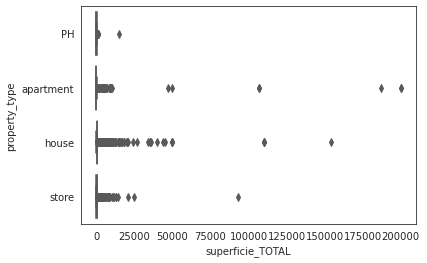

In [1311]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_TOTAL", y="property_type", data=data_clean)

In [1312]:
#me fijo los Outliers de la superficie
detect_outlier(data_clean['superficie_TOTAL'])

(-155.0, 389.0)

In [1313]:
lower_bound_sup,upper_bound_sup=detect_outlier(data_clean['superficie_TOTAL'])

In [1314]:
#Analizo límite superior, tiene sentido son pocos registros
upper_bound_sup_mask=data_clean['superficie_TOTAL']>=upper_bound_sup
mayor_upper_bound_sup=data_clean.loc[upper_bound_sup_mask,:].shape

In [1315]:
mayor_upper_bound_sup

(8065, 22)

In [1316]:
data_clean.superficie_TOTAL.sort_values()

33559          1.0
74548          1.0
111069         1.0
46313          1.0
58009          1.0
            ...   
53314     110000.0
44246     154438.0
76012     187000.0
13405     200000.0
24548     200000.0
Name: superficie_TOTAL, Length: 91948, dtype: float64

N exiten superficies negativas, pero tenemos superficies de 1 m2. Veamos cuántos registros hay con superficies menores a 20 m2.

In [1317]:
lower_bound_sup_mask=data_clean['superficie_TOTAL']<20
menor_lower_bound_sup=data_clean.loc[lower_bound_sup_mask,:].shape

In [1318]:
menor_lower_bound_sup

(373, 22)

Vamos a desestimar los resgistros con superficie total menor a 20 m2.

**Analiamos ahora la superficie CUBIERTA**


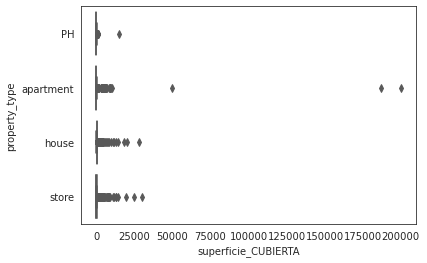

In [1319]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_CUBIERTA", y="property_type", data=data_clean)

In [1320]:
#me fijo los Outliers de la superficie
detect_outlier(data_clean['superficie_CUBIERTA'])

(-112.5, 307.5)

In [1321]:
lower_bound_sup_cubierta,upper_bound_sup_cubierta = detect_outlier(data_clean['superficie_CUBIERTA'])

In [1322]:
#Analizo límite superior, tiene sentido son pocos registros
upper_bound_sup_cubierta_mask = data_clean['superficie_CUBIERTA'] >= upper_bound_sup_cubierta
mayor_upper_bound_sup_cubierta = data_clean.loc[upper_bound_sup_mask,:].shape

In [1323]:
mayor_upper_bound_sup

(8065, 22)

In [1324]:
data_clean.superficie_CUBIERTA.sort_values()

94742          1.0
94654          1.0
23223          1.0
95789          1.0
95725          1.0
            ...   
44245      27853.0
106376     30000.0
11534      49800.0
76012     187000.0
24548     200000.0
Name: superficie_CUBIERTA, Length: 91948, dtype: float64

No exiten superficies negativas, pero tenemos superficies de 1 m2. Veamos cuántos registros hay con superficies menores a 20 m2.

In [1325]:
lower_bound_sup_cubierta_mask = data_clean['superficie_CUBIERTA']<20
menor_lower_bound_sup = data_clean.loc[lower_bound_sup_cubierta_mask,:].shape

In [1326]:
menor_lower_bound_sup

(486, 22)

Vamos a desestimar los resgistros con superficie cubierta menor a 20 m2.

In [1327]:
#Podemos seguir limpiando la data
mask1=data_clean['price_USD'] > 10000
mask2=data_clean['price_USD'] < upper_bound
mask3=data_clean['superficie_TOTAL'] < upper_bound_sup
mask4=data_clean['superficie_TOTAL'] > 20
mask5=data_clean['superficie_CUBIERTA'] < upper_bound_sup_cubierta
mask6=data_clean['superficie_CUBIERTA'] > 20
mask_outliers = mask1&mask2&mask3&mask4&mask5&mask6
data_clean.shape

(91948, 22)

In [1328]:
data_clean=data_clean.loc[mask_outliers,:]

In [1329]:
data_clean.shape

(76573, 22)

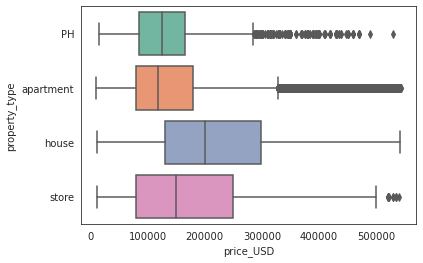

In [1330]:
#Graficamos de nuevo
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="price_USD", y="property_type", data=data_clean)

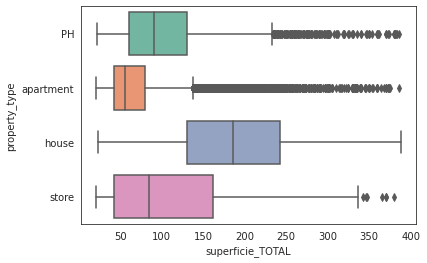

In [1331]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_TOTAL", y="property_type", data=data_clean)

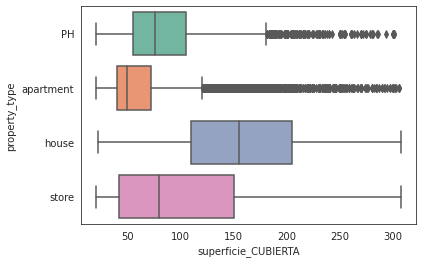

In [1332]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g=sns.boxplot(x="superficie_CUBIERTA", y="property_type", data=data_clean)

### Acá arranca el análisis con **REGEX** para determinar información de `description`

Donde se trata de obtener info con los regex.

In [1333]:
#data_clean

In [1334]:
#paso la columna a mayúscula para no tener tantos patrones
uppercase_description= data_clean['description'].apply(lambda x:x if x is np.NaN else x.upper())

In [1335]:
#Creo un patrón para cochera
patron_cochera="((COCHERA)S?|(GARAGE)S?|(GGE)|(ESTACIONAMIENTO)|(ENTRADA DE COCHE))"
regex_cochera=re.compile(patron_cochera)
resultado_cochera = uppercase_description.apply(lambda x:x if x is np.NaN else regex_cochera.search(x))
print(resultado_cochera)

0                                            None
2                                            None
4                                            None
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217    <re.Match object; span=(555, 563), m...
121218                                       None
121219                                       None
Name: description, Length: 76573, dtype: object


In [1336]:
#Creo una nueva columna llamada Cochera con los números encontrados (1 informa/0 no)
mask_resultado_cochera_notnull=resultado_cochera.notnull()
data_clean.loc[mask_resultado_cochera_notnull,"Cochera"]=resultado_cochera[mask_resultado_cochera_notnull].apply(lambda x: 1)
data_clean['Cochera'].notnull().sum()

33020

In [1337]:
#completo los valores nulos para que queden en 0
data_clean['Cochera']=data_clean['Cochera'].fillna(0)

In [1338]:
#Creo un patrón para escalera o otras cosas que disminuyen valor
patron_escalera="(POR ESCALERA)|(AL FONDO)|(CONTRAFRENTE)|(LATERAL)"
regex_escalera=re.compile(patron_escalera)
resultado_escalera = uppercase_description.apply(lambda x:x if x is np.NaN else regex_escalera.search(x))
print(resultado_escalera)

0                                            None
2         <re.Match object; span=(21, 28), mat...
4         <re.Match object; span=(53, 65), mat...
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217                                       None
121218    <re.Match object; span=(9, 21), matc...
121219                                       None
Name: description, Length: 76573, dtype: object


In [1339]:
#Creo una nueva columna llamada Dism_Valor con los registros encontrados (1 informa/0 no)
mask_resultado_escalera_notnull=resultado_escalera.notnull()
data_clean.loc[mask_resultado_escalera_notnull,"Dism_Valor"]=resultado_escalera[mask_resultado_escalera_notnull].apply(lambda x: 1)
data_clean['Dism_Valor']=data_clean['Dism_Valor'].fillna(0)
data_clean['Dism_Valor']

0         0.0
2         1.0
4         1.0
6         0.0
7         0.0
         ... 
121206    0.0
121209    0.0
121217    0.0
121218    1.0
121219    0.0
Name: Dism_Valor, Length: 76573, dtype: float64

In [1340]:
#Creo un patrón para reciclar
patron_reciclar="(A RECICLAR)|(RENOVAR)|(REFACCIONAR)"
regex_reciclar=re.compile(patron_reciclar)
resultado_reciclar = uppercase_description.apply(lambda x:x if x is np.NaN else regex_reciclar.search(x))
print(resultado_reciclar)

0                                            None
2                                            None
4                                            None
6                                            None
7                                            None
                           ...                   
121206                                       None
121209                                       None
121217                                       None
121218                                       None
121219    <re.Match object; span=(216, 226), m...
Name: description, Length: 76573, dtype: object


In [1341]:
#Creo una nueva columna llamada Reciclar con los registros encontrados (1 informa/0 no)
mask_resultado_reciclar_notnull=resultado_reciclar.notnull()
data_clean.loc[mask_resultado_reciclar_notnull,"A_reciclar"]=resultado_reciclar[mask_resultado_reciclar_notnull].apply(lambda x: 1)
data_clean['A_reciclar']=data_clean['A_reciclar'].fillna(0)
data_clean['A_reciclar']

0         0.0
2         0.0
4         0.0
6         0.0
7         0.0
         ... 
121206    0.0
121209    0.0
121217    0.0
121218    0.0
121219    1.0
Name: A_reciclar, Length: 76573, dtype: float64

In [1342]:
#Creo un patrón para saber si es a estrenar
patron_estrenar="A?\s?(ESTRENAR)"
regex_estrenar=re.compile(patron_estrenar)
resultado_estrenar = uppercase_description.apply(lambda x:x if x is np.NaN else regex_estrenar.search(x))
print(resultado_estrenar)

0                                            None
2                                            None
4                                            None
6                                            None
7         <re.Match object; span=(23, 33), mat...
                           ...                   
121206                                       None
121209                                       None
121217    <re.Match object; span=(38, 48), mat...
121218                                       None
121219                                       None
Name: description, Length: 76573, dtype: object


In [1343]:
#Creo una nueva columna llamada A_estrenar con los registros encontrados(1 informa/0 no)
mask_resultado_estrenar_notnull=resultado_estrenar.notnull()
data_clean.loc[mask_resultado_estrenar_notnull,"A_estrenar"]=resultado_estrenar[mask_resultado_estrenar_notnull].apply(lambda x: 1)
data_clean['A_estrenar']=data_clean['A_estrenar'].fillna(0)
data_clean['A_estrenar']

0         0.0
2         0.0
4         0.0
6         0.0
7         1.0
         ... 
121206    0.0
121209    0.0
121217    1.0
121218    0.0
121219    0.0
Name: A_estrenar, Length: 76573, dtype: float64

In [1344]:
#Creo un patrón para cosas que le agreguen valor
patron_valor="(AMENITIES)|(PILETA)|(PISCINA)|(SUM)|(GIMNASIO)|(SEGURIDAD)|(SAUNA)|(PLAZA)|(BAÑOS)|(APTO PROFESIONAL)|(TERRAZA)|(PATIO)|(PTIO)"
regex_valor=re.compile(patron_valor)
resultado_valor = uppercase_description.apply(lambda x:x if x is np.NaN else regex_valor.search(x))
print(resultado_valor)

0         <re.Match object; span=(69, 74), mat...
2                                            None
4                                            None
6         <re.Match object; span=(155, 160), m...
7         <re.Match object; span=(101, 107), m...
                           ...                   
121206    <re.Match object; span=(173, 178), m...
121209                                       None
121217    <re.Match object; span=(56, 65), mat...
121218    <re.Match object; span=(309, 314), m...
121219    <re.Match object; span=(22, 38), mat...
Name: description, Length: 76573, dtype: object


In [1345]:
#Creo una nueva columna llamada Agr_Valor con los registros encontrados(1 informa/0 no)
mask_resultado_valor_notnull=resultado_valor.notnull()
data_clean.loc[mask_resultado_valor_notnull,"Agr_Valor"]=resultado_valor[mask_resultado_valor_notnull].apply(lambda x: 1)
data_clean['Agr_Valor']=data_clean['Agr_Valor'].fillna(0)
data_clean['Agr_Valor']

0         1.0
2         0.0
4         0.0
6         1.0
7         1.0
         ... 
121206    1.0
121209    0.0
121217    1.0
121218    1.0
121219    1.0
Name: Agr_Valor, Length: 76573, dtype: float64

In [1346]:
data_clean.head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2 AMBIENTES TIPO CASA PLANTA BAJA PO...,2 AMB TIPO CASA SIN EXPENSAS EN PB,62000.0,55.0,40.0,1127.272727,1550.000000,0.0,0.0,0.0,0.0,1.0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING ...,2 AMB 3ER PISO CON ASCENSOR APTO CRE...,72000.0,55.0,55.0,1309.090909,1309.090909,0.0,1.0,0.0,0.0,0.0
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlánt...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINAC...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CEN...,64000.0,35.0,35.0,1828.571429,1828.571429,0.0,1.0,0.0,0.0,0.0
6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|...,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",130000.0,USD,2293785.0,130000.0,106.0,78.0,1226.415094,1666.666667,NaN,MUY BUEN PH AL FRENTE CON ENTRADA IN...,MUY BUEN PH AL FRENTE DOS DORMITORIO...,130000.0,106.0,78.0,1226.415094,1666.666667,0.0,0.0,0.0,0.0,1.0
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AM...,JOSE HERNANDEZ 1400 MONOAMBIENTE ES...,138000.0,45.0,40.0,3066.666667,3450.000000,0.0,0.0,0.0,1.0,1.0


In [1347]:
#Puedo describir en general las métricas
medidas= data_clean[["price_USD", "superficie_TOTAL", "superficie_CUBIERTA", "precio_por_superficie_TOTAL", "precio_por_superficie_CUBIERTA"]].describe().round(2)

In [1348]:
medidas

,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA
count,76573.00,76573.00,76573.00,76573.00,76573.00
mean,165036.77,100.25,87.60,1949.56,2154.12
std,105371.96,73.71,61.28,1072.38,1151.18
min,10039.00,21.00,21.00,33.67,60.49
25%,86000.00,47.00,44.00,1327.27,1458.33
50%,130451.00,71.00,65.00,1819.92,1973.68
75%,218000.00,130.00,110.00,2405.56,2641.03
max,542974.00,388.00,307.00,18086.67,19615.38


In [1349]:
#Aplico Group by para ver info resumida
data_grouped = data_clean.groupby('state_name')

In [1350]:
Analisis=data_grouped['price_USD'].describe()
Analisis

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,17195.0,216408.856528,114710.970350,10375.0,125000.00,189000.0,290000.00,542000.0
Bs.As. G.B.A. Zona Oeste,5486.0,129225.282173,82367.164557,12000.0,74000.00,99000.0,160000.00,530000.0
Bs.As. G.B.A. Zona Sur,8869.0,159857.265983,98656.787055,10656.0,85000.00,130000.0,200000.00,540000.0
Buenos Aires Costa Atlántica,6950.0,127175.655252,81629.963942,10375.0,70000.00,99900.0,160000.00,530000.0
Buenos Aires Interior,1166.0,146288.319039,88665.959470,11111.0,80000.00,123500.0,190000.00,530000.0
Capital Federal,24480.0,176430.558946,105478.101498,10039.0,99000.00,141702.0,225000.00,542974.0
Catamarca,8.0,202756.875000,123036.903128,72909.0,107036.50,155500.0,310000.00,390000.0
Chaco,19.0,141290.105263,95076.509135,28042.0,63094.50,123384.0,187600.00,380000.0
Chubut,115.0,203145.721739,104638.418628,25798.0,123325.00,180000.0,272500.00,500000.0


In [1351]:
data_grouped['superficie_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,17195.0,129.333062,80.788580,21.0,62.00,100.0,188.00,388.0
Bs.As. G.B.A. Zona Oeste,5486.0,113.920707,88.991940,22.0,45.00,75.0,166.75,388.0
Bs.As. G.B.A. Zona Sur,8869.0,117.823204,77.788188,21.0,54.00,90.0,167.00,388.0
Buenos Aires Costa Atlántica,6950.0,88.775971,72.181436,21.0,42.00,62.0,100.00,385.0
Buenos Aires Interior,1166.0,128.386792,87.795317,22.0,58.25,94.0,190.00,385.0
Capital Federal,24480.0,75.657435,52.091382,21.0,41.00,58.0,90.00,381.0
Catamarca,8.0,196.750000,81.380500,76.0,169.50,208.0,243.00,300.0
Chaco,19.0,163.736842,94.116855,41.0,78.50,136.0,240.00,300.0
Chubut,115.0,134.121739,67.343209,28.0,80.00,120.0,185.50,300.0


In [1352]:
data_grouped['superficie_CUBIERTA'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Bs.As. G.B.A. Zona Norte,17195.0,112.878628,70.105023,21.0,55.00,86.0,162.00,307.0
Bs.As. G.B.A. Zona Oeste,5486.0,89.921619,62.812212,21.0,42.00,66.0,120.00,303.0
Bs.As. G.B.A. Zona Sur,8869.0,106.304769,67.190158,21.0,51.00,84.0,149.00,306.0
Buenos Aires Costa Atlántica,6950.0,75.945324,52.781683,21.0,40.00,60.0,90.00,302.0
Buenos Aires Interior,1166.0,106.527444,66.164022,22.0,54.25,85.0,143.00,303.0
Capital Federal,24480.0,66.874060,43.371853,21.0,38.00,51.0,80.00,307.0
Catamarca,8.0,171.375000,67.181923,76.0,132.00,190.5,208.00,270.0
Chaco,19.0,139.842105,83.842619,38.0,68.50,128.0,174.50,300.0
Chubut,115.0,132.643478,67.534681,28.0,80.00,120.0,182.50,300.0


In [1353]:
#El precio por m2 aumenta si tiene o no cochera?
data_grouped=data_clean.groupby(["property_type","Cochera"])
m2=data_grouped['precio_por_superficie_TOTAL'].mean()
m2

property_type  Cochera
PH             0.0        1481.521997
               1.0        1498.413611
apartment      0.0        2157.676487
               1.0        2349.958892
house          0.0        1271.460033
               1.0        1217.537229
store          0.0        2097.033673
               1.0        2051.314357
Name: precio_por_superficie_TOTAL, dtype: float64

In [1354]:
#El precio por m2 aumenta si tiene o no cochera?
data_grouped=data_clean.groupby(["state_name","Cochera"])
m2=data_grouped['precio_por_superficie_TOTAL'].mean()
m2

state_name                    Cochera
Bs.As. G.B.A. Zona Norte      0.0        1760.821103
                              1.0        2099.588342
Bs.As. G.B.A. Zona Oeste      0.0        1425.415113
                              1.0        1469.416957
Bs.As. G.B.A. Zona Sur        0.0        1511.733158
                              1.0        1598.998433
Buenos Aires Costa Atlántica  0.0        1630.714397
                              1.0        1845.583098
Buenos Aires Interior         0.0        1477.068747
                              1.0        1421.405501
Capital Federal               0.0        2496.303127
                              1.0        2704.897612
Catamarca                     0.0        1690.474612
                              1.0         677.070556
Chaco                         0.0         803.509127
                              1.0        1275.238206
Chubut                        0.0        1646.657740
                              1.0        2006.053605
Corrient

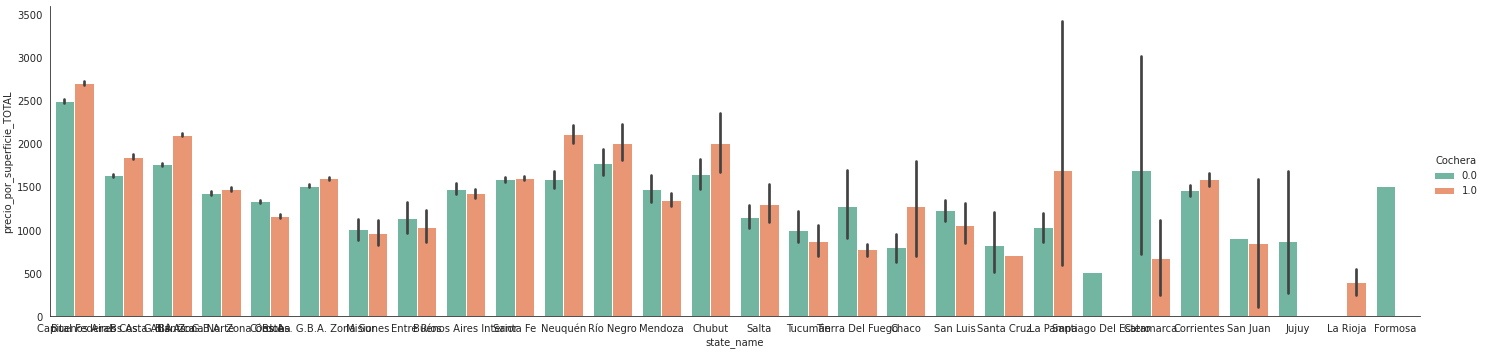

In [1355]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Cochera')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [1356]:
#El precio por m2 aumenta si es a estrenar?
data_grouped=data_clean.groupby(["state_name","A_estrenar"])
estreno=data_grouped['precio_por_superficie_TOTAL'].mean()
estreno

state_name                    A_estrenar
Bs.As. G.B.A. Zona Norte      0.0           1914.385188
                              1.0           2143.800235
Bs.As. G.B.A. Zona Oeste      0.0           1402.717231
                              1.0           1793.820381
Bs.As. G.B.A. Zona Sur        0.0           1531.886247
                              1.0           1803.905818
Buenos Aires Costa Atlántica  0.0           1667.904233
                              1.0           2094.587115
Buenos Aires Interior         0.0           1429.554007
                              1.0           1667.658194
Capital Federal               0.0           2556.315282
                              1.0           2679.737242
Catamarca                     0.0           1437.123598
Chaco                         0.0            977.304051
Chubut                        0.0           1676.525343
                              1.0           1852.120543
Corrientes                    0.0           1507.157154
       

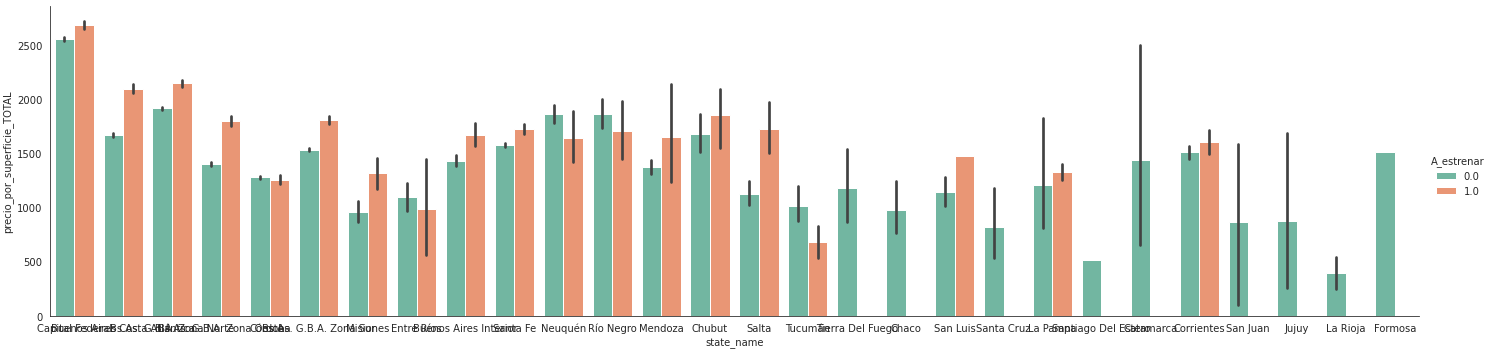

In [1357]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='A_estrenar')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [1358]:
#El precio por m2 aumenta si es a reciclar?
data_grouped=data_clean.groupby(["state_name","A_reciclar"])
reciclar=data_grouped['precio_por_superficie_TOTAL'].mean()
reciclar

state_name                    A_reciclar
Bs.As. G.B.A. Zona Norte      0.0           1948.537093
                              1.0           1521.220119
Bs.As. G.B.A. Zona Oeste      0.0           1461.473888
                              1.0            821.995323
Bs.As. G.B.A. Zona Sur        0.0           1565.238802
                              1.0           1029.476704
Buenos Aires Costa Atlántica  0.0           1726.966356
                              1.0            899.073380
Buenos Aires Interior         0.0           1473.495179
                              1.0            634.128333
Capital Federal               0.0           2583.582047
                              1.0           1756.655438
Catamarca                     0.0           1437.123598
Chaco                         0.0            977.304051
Chubut                        0.0           1692.003881
                              1.0           1240.975936
Corrientes                    0.0           1528.785328
       

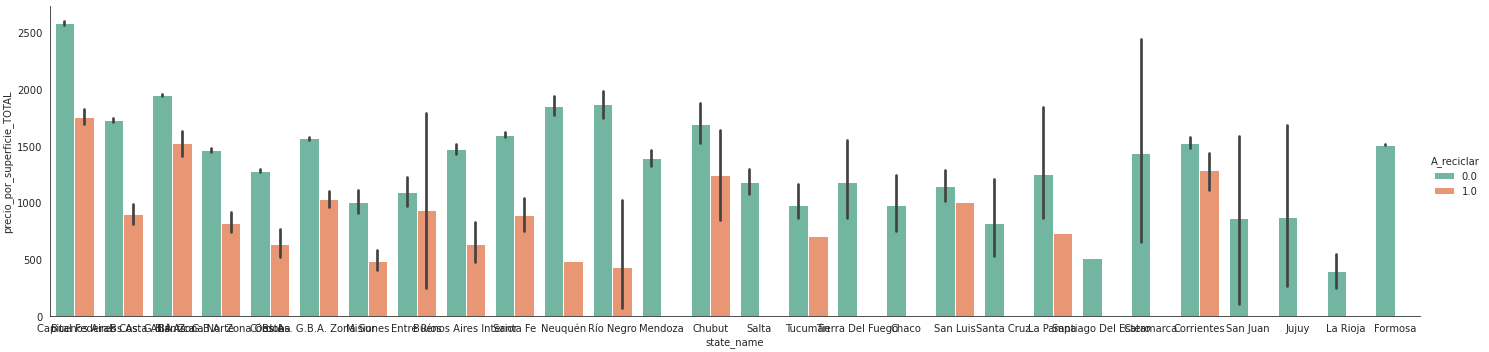

In [1359]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='A_reciclar')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [1360]:
##El precio por m2 aumenta si tiene amenities, pileta, seguridad, etc?
data_grouped=data_clean.groupby(["property_type","Agr_Valor"])
agrvalor=data_grouped['precio_por_superficie_TOTAL'].mean()
agrvalor

property_type  Agr_Valor
PH             0.0          1486.216533
               1.0          1485.621954
apartment      0.0          2054.245581
               1.0          2353.542431
house          0.0          1210.210905
               1.0          1259.303203
store          0.0          2239.073241
               1.0          1868.840388
Name: precio_por_superficie_TOTAL, dtype: float64

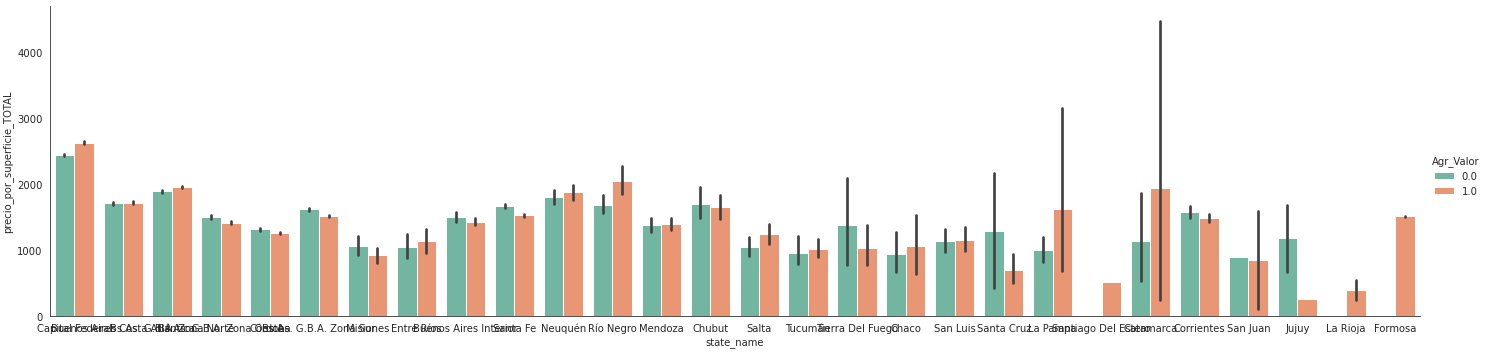

In [1361]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Agr_Valor')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

In [1362]:
#El precio por m2 disminuye si es al contrafrente, por escalera, etc?
data_grouped=data_clean.groupby(["property_type","Dism_Valor"])
dsmvalor=data_grouped['precio_por_superficie_TOTAL'].mean()
dsmvalor

property_type  Dism_Valor
PH             0.0           1474.321234
               1.0           1520.382336
apartment      0.0           2270.235505
               1.0           2101.409065
house          0.0           1245.290533
               1.0           1244.823788
store          0.0           2090.896789
               1.0           2116.776998
Name: precio_por_superficie_TOTAL, dtype: float64

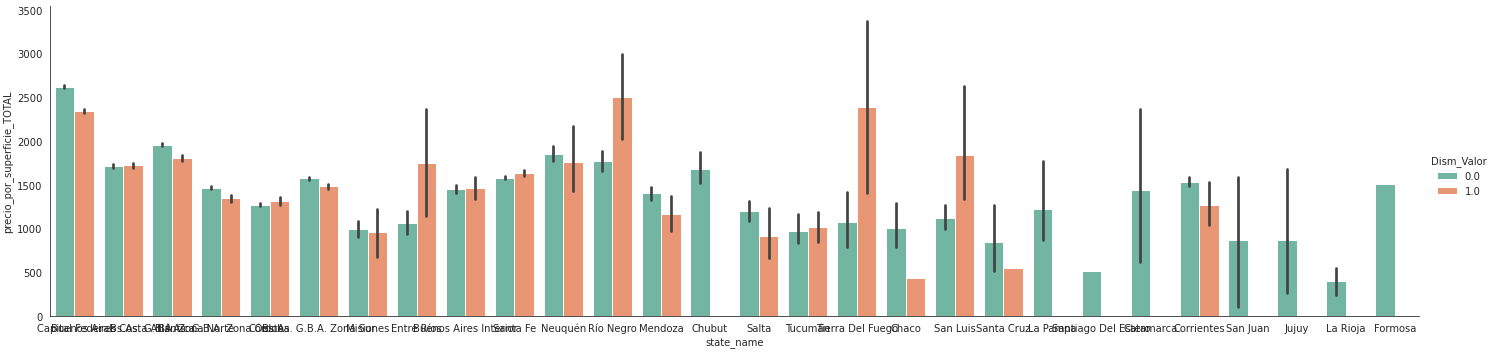

In [1363]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="state_name",y='precio_por_superficie_TOTAL', data=data_clean, aspect=4.0, kind='bar',
                    hue='Dism_Valor')
       
        g.set_ylabels('precio_por_superficie_TOTAL')

### Acá arranca el análisis de Ariel con pivot tables y gráficos.


In [1364]:
# Limpio algunas columnas que no me interesan:
#subset = ['place_with_parent_names','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','rooms']

#NOTA AH 20201218: esto es propio de la r3
subset = ['place_with_parent_names','price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']

df = data_clean.drop(subset, axis = 1)
print(df.shape)
df.sample(3)

(76573, 19)


,property_type,place_name,state_name,geonames_id,lat-lon,currency,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
67674,house,Burzaco,Bs.As. G.B.A. Zona Sur,3435894.0,NaN,USD,NaN,Chalet totalmente refaccionado en ba...,Casa en Burzaco,150000.0,120.0,120.0,1250.000000,1250.000000,1.0,0.0,0.0,0.0,0.0
116904,house,Tigre,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,USD,NaN,CASA EN SAN BENITO VILLA NUEVA AL AG...,CASA EN VENTA VILLANUEVA SAN BENITO ...,480000.0,290.0,290.0,1655.172414,1655.172414,1.0,0.0,0.0,0.0,1.0
95045,house,Olivos,Bs.As. G.B.A. Zona Norte,3430310.0,NaN,USD,NaN,Impecable Duplex 7 ambientes con exc...,dx vta,307000.0,205.0,205.0,1497.560976,1497.560976,0.0,0.0,0.0,0.0,1.0


In [1365]:
print("Tamaño del registro: "+str(df.shape[0]))
print("Cochera: "+str((df.Cochera==1).sum()))
print("Dism_Valor: "+str((df.Dism_Valor==1).sum()))
print("A_reciclar: "+str((df.A_reciclar==1).sum()))
print("Agr_Valor: "+str((df.Agr_Valor==1).sum()))


Tamaño del registro: 76573
Cochera: 33020
Dism_Valor: 11926
A_reciclar: 1234
Agr_Valor: 49940


**Vamos a quedarnos con los datos de Capital Federal (CABA)**

In [1366]:
mask_caba = df.state_name == "Capital Federal"
mask_caba.notnull().sum()

data_caba_nulls_in_rooms = df.loc[mask_caba]
data_caba_nulls_in_rooms.shape[0]

24480

**Pero que no tenga nulls en `rooms`**

#NOTA AH 20201218: esto es propio de la r3

In [1367]:
mask_rooms = data_caba_nulls_in_rooms.rooms.notnull()

data_caba = data_caba_nulls_in_rooms.loc[mask_rooms]
data_caba.shape[0]

12490

In [1368]:
DF = data_caba
print("Vemos registros de Capital Federal (CABA):")
print("Tamaño del registro: "+str(DF.shape[0]))
print("Cochera: "+str((DF.Cochera==1).sum()))
print("Dism_Valor: "+str((DF.Dism_Valor==1).sum()))
print("A_reciclar: "+str((DF.A_reciclar==1).sum()))
print("Agr_Valor: "+str((DF.Agr_Valor==1).sum()))

Vemos registros de Capital Federal (CABA):
Tamaño del registro: 12490
Cochera: 4360
Dism_Valor: 2602
A_reciclar: 260
Agr_Valor: 8842


In [1369]:
data_place_name = data_caba.groupby('place_name')
type(data_place_name)

pandas.core.groupby.generic.DataFrameGroupBy

In [1370]:
data_place_name.size().sort_values(ascending = False)

place_name
Caballito               1064
Palermo                  994
Belgrano                 922
Almagro                  614
Recoleta                 606
Flores                   594
Barrio Norte             524
Villa Crespo             508
Villa Urquiza            479
Boedo                    467
San Telmo                416
Balvanera                402
Nuñez                    298
Monserrat                263
San Cristobal            226
Floresta                 221
Barracas                 217
Colegiales               203
Congreso                 186
Villa Devoto             184
Saavedra                 179
Palermo Hollywood        169
Villa del Parque         148
Centro / Microcentro     143
Coghlan                  135
Palermo Soho             133
Constitución             128
San Nicolás              125
Puerto Madero            122
Villa Luro               113
Parque Patricios         103
Once                     102
Liniers                  101
Chacarita                101
Par

In [1371]:
data_place_name.describe().round(2)

geonames_id                                        \
                           count       mean  std        min        25%   
place_name                                                               
Abasto                       0.0        NaN  NaN        NaN        NaN   
Agronomía                   27.0  3436487.0  0.0  3436487.0  3436487.0   
Almagro                    614.0  3436397.0  0.0  3436397.0  3436397.0   
Balvanera                  402.0  6693228.0  0.0  6693228.0  6693228.0   
Barracas                   217.0  3436134.0  0.0  3436134.0  3436134.0   
Barrio Norte               524.0  3436109.0  0.0  3436109.0  3436109.0   
Belgrano                   922.0  3436077.0  0.0  3436077.0  3436077.0   
Boca                        69.0  3436004.0  0.0  3436004.0  3436004.0   
Boedo                      467.0  3436003.0  0.0  3436003.0  3436003.0   
Caballito                 1064.0  3435874.0  0.0  3435874.0  3435874.0   
Capital Federal             30.0  3433955.0  0.0  3433955.0  3433955.0   
Centro / Microcentro       143.0  3435548.0  0.0  3435548.0  3435548.0   
Chacarita                  101.0  3435506.0  0.0  3435506.0  3435506.0   
Coghlan                    135.0  3435359.0  0.0  3435359.0  3435359.0   
Colegiales                 203.0  3435356.0  0.0  3435356.0  3435356.0   
Congreso                   186.0  3435259.0  0.0  3435259.0  3435259.0   
Constitución               128.0  3435257.0  0.0  3435257.0  3435257.0   
Flores                     594.0  3433918.0  0.0  3433918.0  3433918.0   
Floresta                   221.0  3433910.0  0.0  3433910.0  3433910.0   
Las Cañitas                  0.0        NaN  NaN        NaN        NaN   
Liniers                    101.0  3431333.0  0.0  3431333.0  3431333.0   
Mataderos                   96.0  3430787.0  0.0  3430787.0  3430787.0   
Monserrat                  263.0  3430570.0  0.0  3430570.0  3430570.0   
Monte Castro                49.0  3430596.0  0.0  3430596.0  3430596.0   
Nuñez                      298.0  3430348.0  0.0  3430348.0  3430348.0   
Once                       102.0  3430291.0  0.0  3430291.0  3430291.0   
Palermo                    994.0  3430234.0  0.0  3430234.0  3430234.0   
Palermo Chico                0.0        NaN  NaN        NaN        NaN   
Palermo Hollywood            0.0        NaN  NaN        NaN        NaN   
Palermo Soho               133.0  3430234.0  0.0  3430234.0  3430234.0   
Palermo Viejo                0.0        NaN  NaN        NaN        NaN   
Parque Avellaneda            0.0        NaN  NaN        NaN        NaN   
Parque Centenario            0.0        NaN  NaN        NaN        NaN   
Parque Chacabuco           101.0  3430116.0  0.0  3430116.0  3430116.0   
Parque Chas                 37.0  3430115.0  0.0  3430115.0  3430115.0   
Parque Patricios           103.0  3430114.0  0.0  3430114.0  3430114.0   
Paternal                    75.0  3430087.0  0.0  3430087.0  3430087.0   
Pompeya                     26.0  3430387.0  0.0  3430387.0  3430387.0   
Puerto Madero              122.0  3429760.0  0.0  3429760.0  3429760.0   
Recoleta                   606.0  3429595.0  0.0  3429595.0  3429595.0   
Retiro                      89.0  3429576.0  0.0  3429576.0  3429576.0   
Saavedra                   179.0  3429422.0  0.0  3429422.0  3429422.0   
San Cristobal              226.0  3429153.0  0.0  3429153.0  3429153.0   
San Nicolás                125.0  6693229.0  0.0  6693229.0  6693229.0   
San Telmo                  416.0  3428113.0  0.0  3428113.0  3428113.0   
Tribunales                   0.0        NaN  NaN        NaN        NaN   
Velez Sarsfield             15.0  3427528.0  0.0  3427528.0  3427528.0   
Versalles                   28.0  3427510.0  0.0  3427510.0  3427510.0   
Villa Crespo               508.0  3427458.0  0.0  3427458.0  3427458.0   
Villa Devoto               184.0  3427451.0  0.0  3427451.0  3427451.0   
Villa General Mitre         37.0  3427433.0  0.0  3427433.0  3427433.0   
Villa Lugano             

In [1372]:
data_caba.head(1)

,property_type,place_name,state_name,geonames_id,lat-lon,currency,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,USD,1.0,Torre I Mondrian. 3 ambientes con t...,Vitraux Palermo,111700.0,50.0,30.0,2234.0,3723.333333,0.0,0.0,0.0,0.0,1.0


In [1373]:
ddd = data_caba.pivot_table(['price_USD', 'superficie_TOTAL',
       'superficie_CUBIERTA', 'precio_por_superficie_TOTAL', 'precio_por_superficie_CUBIERTA'], index= ['place_name','property_type'], aggfunc=np.median).round(2).sort_values(by=['place_name','property_type'], ascending=False)
ddd

precio_por_superficie_CUBIERTA  \
place_name           property_type                                   
Villa del Parque     house                                 2208.54   
                     apartment                             2250.00   
                     PH                                    2071.75   
Villa Urquiza        store                                 1622.22   
                     house                                 2131.82   
                     apartment                             2812.50   
                     PH                                    2313.04   
Villa Soldati        house                                 1005.31   
                     apartment                              860.65   
                     PH                                    1108.97   
Villa Santa Rita     apartment                             2076.16   
                     PH                                    2207.98   
Villa Riachuelo      apartment                             1416.67   
Villa Real           house                                 1566.67   
                     apartment                             1967.76   
                     PH                                    2123.08   
Villa Pueyrredón     house                                 1813.71   
                     apartment                             2405.66   
                     PH                                    2651.52   
Villa Ortuzar        store                                 1800.00   
                     house                                 2209.30   
                     apartment                             2719.32   
                     PH                                    1927.13   
Villa Luro           house                                 1800.00   
                     apartment                             2155.17   
                     PH                                    1846.15   
Villa Lugano         house                                 1289.81   
                     apartment                             1210.69   
                     PH                                    1275.51   
Villa General Mitre  house                                 1815.03   
                     apartment                             2217.39   
                     PH                                    2080.65   
Villa Devoto         store                                 1374.27   
                     house                                 1946.25   
                     apartment                             2359.22   
                     PH                                    2435.61   
Villa Crespo         store                                 5960.00   
                     house                                 2192.86   
                     apartment                             2473.68   
                     PH                                    2410.60   
Versalles            house                                 1699.97   
                     apartment                             2135.28   
                     PH                                    2058.65   
Velez Sarsfield      house                                 1341.46   
                     apartment                             2397.05   
                     PH                                    1496.60   
Tribunales           apartment                             2058.99   
San Telmo            house                                 1460.00   
                     apartment                             2441.91   
                     PH                                    1823.08   
San Nicolás          house                                  897.44   
                     apartment                             2219.22   
                     PH                                    2651.60   
San Cristobal        house                                 1590.91   
                     apartment                             2245.09   
                     PH                       

In [1374]:
data_caba.describe()

,geonames_id,rooms,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor
count,1.197000e+04,12490.000000,12490.000000,12490.00000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000
mean,3.585446e+06,2.546517,177598.303523,75.23707,67.999520,2610.756072,2830.632055,0.349079,0.208327,0.020817,0.100080,0.707926
std,6.891774e+05,1.326916,108049.641436,49.52252,42.265583,1627.853580,1671.835181,0.476698,0.406128,0.142776,0.300119,0.454734
min,3.427366e+06,1.000000,13460.000000,21.00000,21.000000,180.266234,180.266234,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430114e+06,1.000000,98000.000000,40.00000,38.000000,1929.514964,2073.170732,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.433914e+06,2.000000,143000.000000,60.00000,55.000000,2350.213675,2542.857143,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.436003e+06,3.000000,225597.750000,92.00000,83.000000,2857.142857,3114.426692,1.000000,0.000000,0.000000,0.000000,1.000000
max,6.693230e+06,12.000000,542974.000000,381.00000,307.000000,18086.666667,19615.384615,1.000000,1.000000,1.000000,1.000000,1.000000


**Calculo valores medios y desvíos estandar**

In [1375]:
pd.set_option('mode.chained_assignment', None)

In [1376]:
data_caba.loc[:,'price_USD_mean'] = data_caba.price_USD.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'superficie_TOTAL_mean'] = data_caba.superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'superficie_CUBIERTA_mean'] = data_caba.superficie_CUBIERTA.apply(lambda x: x if x is np.NaN else np.mean(x))
data_caba.loc[:,'precio_por_superficie_TOTAL_mean'] = data_caba.price_USD_mean / data_caba.superficie_TOTAL_mean
data_caba.loc[:,'precio_por_superficie_CUBIERTA_mean'] = data_caba.price_USD_mean / data_caba.superficie_CUBIERTA_mean

In [1377]:
data_caba.loc[:,'price_USD_std'] = data_caba.price_USD.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'superficie_TOTAL_std'] = data_caba.superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'superficie_CUBIERTA_std'] = data_caba.superficie_CUBIERTA.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'precio_por_superficie_TOTAL_std'] = data_caba.precio_por_superficie_TOTAL.apply(lambda x: x if x is np.NaN else np.std(x))
data_caba.loc[:,'precio_por_superficie_CUBIERTA_std'] = data_caba.precio_por_superficie_CUBIERTA_mean.apply(lambda x: x if x is np.NaN else np.std(x))

In [1378]:
#data_caba.loc[:,'std_mean_total'] = data.precio_por_superficie_TOTAL_std / data.precio_por_superficie_TOTAL_mean
#data_caba.loc[:,'std_mean_cubierta'] = data.precio_por_superficie_CUBIERTA_std / data.precio_por_superficie_CUBIERTA_mean

In [1379]:
pd.reset_option('mode.chained_assignment')

In [1380]:
mask_barrios = np.logical_or(np.logical_or(data_caba.place_name == 'Belgrano',data_caba.place_name == 'Palermo'),np.logical_or(data_caba.place_name == 'Caballito',data_caba.place_name == 'Mataderos'))
data_barrios = data_caba.loc[mask_barrios]

*********************************

In [1381]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [1382]:
#Podemos hacer tantos como querramos
#grafico=data_caba.placename[].loc[:,["state_name",'precio_por_superficie_TOTAL','property_type','place_name']]
grafico = data_barrios

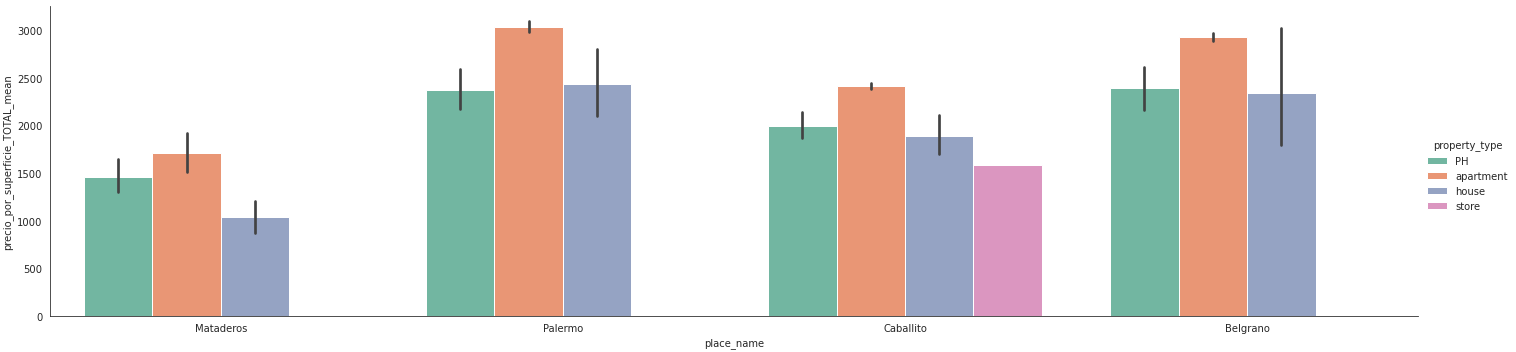

In [1383]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_TOTAL_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_TOTAL_mean')

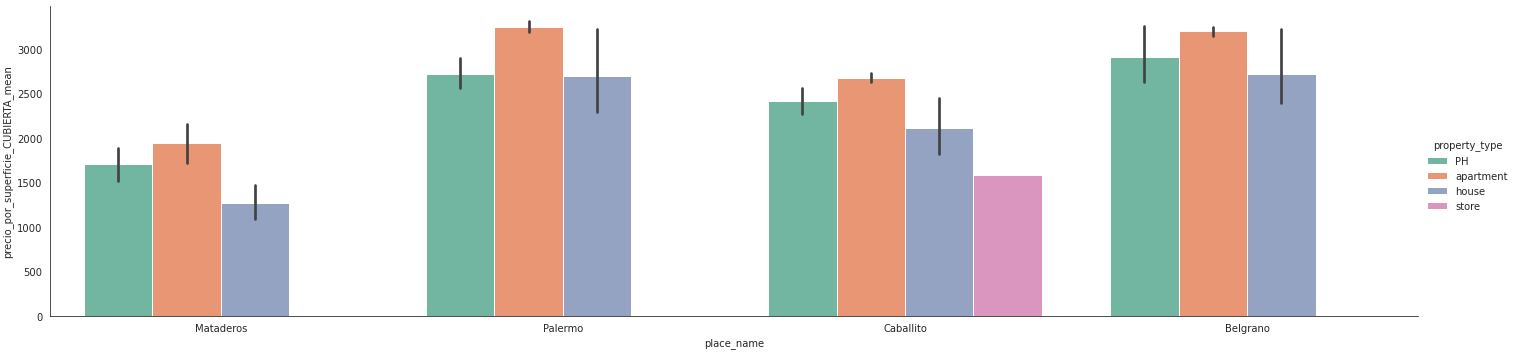

In [1384]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_CUBIERTA_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_CUBIERTA_mean')

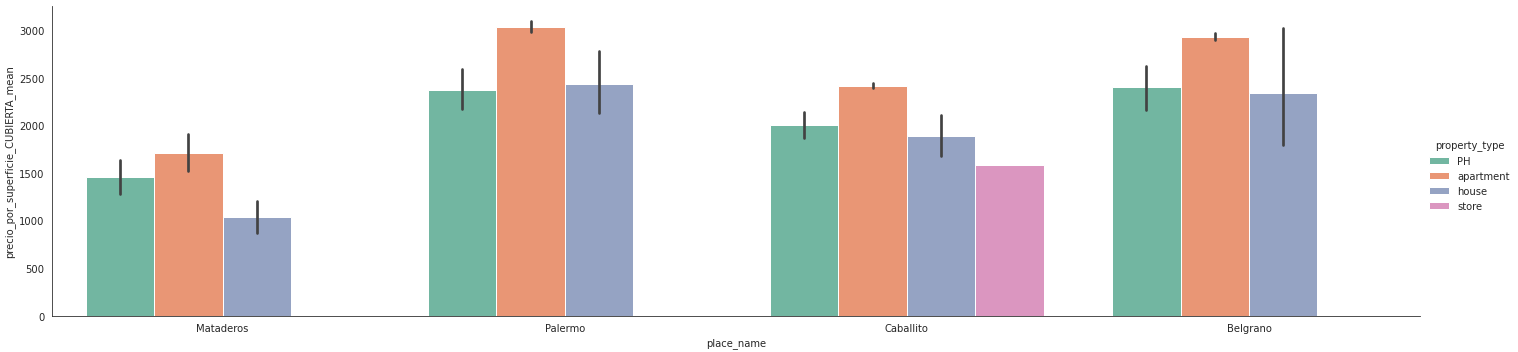

In [1385]:
with sns.axes_style('white'):
    with sns.color_palette("Set2"):
        g = sns.catplot(x="place_name",y='precio_por_superficie_TOTAL_mean', data=grafico, aspect=4.0, kind='bar',
                    hue='property_type')
       
        g.set_ylabels('precio_por_superficie_CUBIERTA_mean')

In [1386]:
data_caba.head(3)

,property_type,place_name,state_name,geonames_id,lat-lon,currency,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor,price_USD_mean,superficie_TOTAL_mean,superficie_CUBIERTA_mean,precio_por_superficie_TOTAL_mean,precio_por_superficie_CUBIERTA_mean,price_USD_std,superficie_TOTAL_std,superficie_CUBIERTA_std,precio_por_superficie_TOTAL_std,precio_por_superficie_CUBIERTA_std
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,USD,1.0,Torre I Mondrian. 3 ambientes con t...,Vitraux Palermo,111700.0,50.0,30.0,2234.000000,3723.333333,0.0,0.0,0.0,0.0,1.0,111700.0,50.0,30.0,2234.000000,3723.333333,0.0,0.0,0.0,0.0,0.0
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,USD,1.0,Torre II Dalí. Ambiente unico divisi...,Vitraux Palermo,147900.0,42.0,31.0,3521.428571,4770.967742,0.0,0.0,0.0,0.0,1.0,147900.0,42.0,31.0,3521.428571,4770.967742,0.0,0.0,0.0,0.0,0.0
16,PH,Mataderos,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",USD,4.0,Ventas Mataderos al frente Duplex 4 ...,VENTA-MATADEROS-DUPLEX 4 AMB.,239000.0,140.0,98.0,1707.142857,2438.775510,0.0,0.0,0.0,0.0,0.0,239000.0,140.0,98.0,1707.142857,2438.775510,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='precio_por_superficie_TOTAL'>

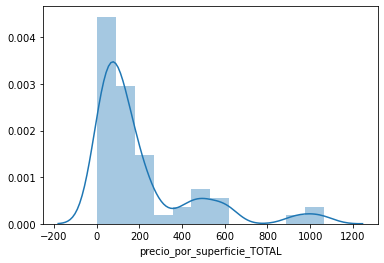

In [1387]:
sns.distplot(data_caba.groupby('place_name')['precio_por_superficie_TOTAL'].size())
#sns.distplot(data['y']);

In [1388]:
data_caba.geonames_id.value_counts().sum()

11970

In [1389]:
data_caba.geonames_id.isnull().sum()

520

In [1390]:

#data_caba=data_caba.dropna(subset=['geonames_id'])
#data_caba.shape


In [1391]:
data_caba

,property_type,place_name,state_name,geonames_id,lat-lon,currency,rooms,description,title,price_USD,superficie_TOTAL,superficie_CUBIERTA,precio_por_superficie_TOTAL,precio_por_superficie_CUBIERTA,Cochera,Dism_Valor,A_reciclar,A_estrenar,Agr_Valor,price_USD_mean,superficie_TOTAL_mean,superficie_CUBIERTA_mean,precio_por_superficie_TOTAL_mean,precio_por_superficie_CUBIERTA_mean,price_USD_std,superficie_TOTAL_std,superficie_CUBIERTA_std,precio_por_superficie_TOTAL_std,precio_por_superficie_CUBIERTA_std
13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,USD,1.0,Torre I Mondrian. 3 ambientes con t...,Vitraux Palermo,111700.0,50.0,30.0,2234.000000,3723.333333,0.0,0.0,0.0,0.0,1.0,111700.0,50.0,30.0,2234.000000,3723.333333,0.0,0.0,0.0,0.0,0.0
14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,USD,1.0,Torre II Dalí. Ambiente unico divisi...,Vitraux Palermo,147900.0,42.0,31.0,3521.428571,4770.967742,0.0,0.0,0.0,0.0,1.0,147900.0,42.0,31.0,3521.428571,4770.967742,0.0,0.0,0.0,0.0,0.0
16,PH,Mataderos,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",USD,4.0,Ventas Mataderos al frente Duplex 4 ...,VENTA-MATADEROS-DUPLEX 4 AMB.,239000.0,140.0,98.0,1707.142857,2438.775510,0.0,0.0,0.0,0.0,0.0,239000.0,140.0,98.0,1707.142857,2438.775510,0.0,0.0,0.0,0.0,0.0
19,apartment,Palermo,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",USD,3.0,Excelente semipiso al contra frente ...,Bulnes y Libertador: espectacular pu...,350000.0,104.0,96.0,3365.384615,3645.833333,0.0,0.0,0.0,0.0,1.0,350000.0,104.0,96.0,3365.384615,3645.833333,0.0,0.0,0.0,0.0,0.0
21,apartment,Palermo,Capital Federal,3430234.0,"-34.590926,-58.4116653",USD,4.0,"EXCELENTE ZONA, MULTIPLES MEDIOS DE ...",Departamento de 4 ambientes en Venta...,270500.0,118.0,73.0,2292.372881,3705.479452,0.0,0.0,0.0,0.0,1.0,270500.0,118.0,73.0,2292.372881,3705.479452,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120195,apartment,Nuñez,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",USD,1.0,Venta de Departamento de 1 AMBIENTE ...,Crisologo Larralde 2400 - Piso 5 Dpt...,161500.0,76.0,38.0,2125.000000,4250.000000,0.0,0.0,0.0,0.0,1.0,161500.0,76.0,38.0,2125.000000,4250.000000,0.0,0.0,0.0,0.0,0.0
120196,apartment,Nuñez,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",USD,1.0,Venta de Departamento de 1 AMBIENTE ...,Crisologo Larralde 2400 - Piso 7 Dpt...,115700.0,43.0,32.0,2690.697674,3615.625000,0.0,0.0,0.0,0.0,1.0,115700.0,43.0,32.0,2690.697674,3615.625000,0.0,0.0,0.0,0.0,0.0
120197,apartment,Nuñez,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",USD,1.0,Venta de Departamento de 1 AMBIENTE ...,Crisologo Larralde 2400 - Piso 4 Dpt...,126900.0,48.0,39.0,2643.750000,3253.846154,0.0,0.0,0.0,0.0,1.0,126900.0,48.0,39.0,2643.750000,3253.846154,0.0,0.0,0.0,0.0,0.0
120198,apartment,Nuñez,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",USD,3.0,Venta de Departamento de 3 AMBIENTE ...,Crisologo Larralde 2400 - Piso 3 Dpt...,309200.0,115.0,96.0,2688.695652,3220.833333,0.0,0.0,0.0,0.0,1.0,309200.0,115.0,96.0,2688.695652,3220.833333,0.0,0.0,0.0,0.0,0.0


In [1392]:
property_type_dummies=pd.get_dummies(data_caba.property_type,drop_first=True)


In [1393]:
place_name_dummies=pd.get_dummies(data_caba.place_name,drop_first=True)

In [1394]:
data_caba.currency.value_counts()

USD    12150
ARS      340
Name: currency, dtype: int64

In [1395]:
currency_dummies=pd.get_dummies(data_caba.currency,drop_first=True)

In [1396]:
currency_dummies.columns

Index(['USD'], dtype='object')

In [1397]:
#geo_dummies=pd.get_dummies(data_caba.geonames_id,drop_first=True)

In [1398]:
#geo_dummies.columns.astype(object)

In [1399]:
data_caba=pd.concat([data_caba,property_type_dummies],axis=1)

In [1400]:
data_caba=pd.concat([data_caba,place_name_dummies],axis=1)

In [1401]:
data_caba=pd.concat([data_caba,currency_dummies],axis=1)

In [1402]:
#data_caba=pd.concat([data_caba,geo_dummies],axis=1)

In [1403]:
data_caba.columns

Index(['property_type', 'place_name', 'state_name', 'geonames_id', 'lat-lon',
       'currency', 'rooms', 'description', 'title', 'price_USD',
       'superficie_TOTAL', 'superficie_CUBIERTA',
       'precio_por_superficie_TOTAL', 'precio_por_superficie_CUBIERTA',
       'Cochera', 'Dism_Valor', 'A_reciclar', 'A_estrenar', 'Agr_Valor',
       'price_USD_mean', 'superficie_TOTAL_mean', 'superficie_CUBIERTA_mean',
       'precio_por_superficie_TOTAL_mean',
       'precio_por_superficie_CUBIERTA_mean', 'price_USD_std',
       'superficie_TOTAL_std', 'superficie_CUBIERTA_std',
       'precio_por_superficie_TOTAL_std', 'precio_por_superficie_CUBIERTA_std',
       'apartment', 'house', 'store', 'Agronomía', 'Almagro', 'Balvanera',
       'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Capital Federal', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos

In [1404]:

feature_cols_corr=[]
feature_cols_corr=['price_USD','rooms','superficie_TOTAL','Cochera', 'Dism_Valor', 'A_reciclar', 'A_estrenar']
data_caba
data_caba[feature_cols_corr].corr()


,price_USD,rooms,superficie_TOTAL,Cochera,Dism_Valor,A_reciclar,A_estrenar
price_USD,1.000000,0.558578,0.666073,0.215619,-0.073529,0.002095,-0.112433
rooms,0.558578,1.000000,0.767794,-0.007319,0.026739,0.116187,-0.202904
superficie_TOTAL,0.666073,0.767794,1.000000,0.088933,-0.002770,0.099330,-0.137547
Cochera,0.215619,-0.007319,0.088933,1.000000,-0.048102,-0.044424,0.097748
Dism_Valor,-0.073529,0.026739,-0.002770,-0.048102,1.000000,0.020485,-0.018662
A_reciclar,0.002095,0.116187,0.099330,-0.044424,0.020485,1.000000,-0.048623
A_estrenar,-0.112433,-0.202904,-0.137547,0.097748,-0.018662,-0.048623,1.000000


<AxesSubplot:>

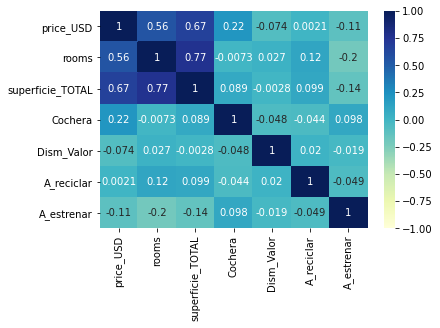

In [1405]:
sns.heatmap(data_caba[feature_cols_corr].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True)

In [1406]:
from sklearn import metrics 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [1407]:
from sklearn.model_selection import train_test_split

def train_test_R2(feature_cols):
    X = data_caba[feature_cols]
    y = data_caba.price_USD
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
     # Analizamos primero el train
    y_pred = linreg.predict(X_train)
    A=r2_score(y_train,y_pred)
    B=linreg.intercept_
    C=linreg.coef_
    D=list(zip(feature_cols, linreg.coef_))
    return A,B,D

In [1408]:
feature_cols = ['superficie_CUBIERTA','Cochera', 'Dism_Valor', 'A_reciclar', 'A_estrenar', 'Agr_Valor',
      'apartment', 'house', 'store', 'Almagro', 'Balvanera',
       'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Liniers', 'Mataderos', 'Monserrat',
       'Monte Castro', 'Nuñez', 'Once', 'Palermo', 'Palermo Soho', 'Parque Chacabuco',
       'Parque Chas', 'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal',
       'San Nicolás', 'San Telmo', 'Velez Sarsfield',
       'Versalles', 'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque','USD','rooms','Palermo Chico', 'Agronomía', 'Las Cañitas', 'Parque Centenario', 'Palermo Viejo', 'Tribunales', 'Parque Avellaneda', 'Palermo Hollywood']

In [1409]:
train_test_R2(feature_cols)

(0.6747083104121477,
 -34843.562692243286,
 [('superficie_CUBIERTA', 1566.759343182074),
  ('Cochera', 29691.21192002709),
  ('Dism_Valor', -5486.925443919143),
  ('A_reciclar', -36416.29934234603),
  ('A_estrenar', -14075.136768947326),
  ('Agr_Valor', 13800.725822662862),
  ('apartment', 20445.818007725473),
  ('house', -27424.44610610268),
  ('store', 26711.63179166522),
  ('Almagro', 8860.519738762967),
  ('Balvanera', -13859.253896201306),
  ('Barracas', -202.19749854705697),
  ('Barrio Norte', 67843.54601551988),
  ('Belgrano', 58531.723920229924),
  ('Boca', -23972.79454981465),
  ('Boedo', 116611.06490231089),
  ('Caballito', 19855.829448425782),
  ('Capital Federal', 17641.277101512205),
  ('Centro / Microcentro', -34.36907242548614),
  ('Chacarita', 2999.3053921172504),
  ('Coghlan', 20083.98548070601),
  ('Colegiales', 30711.452092427266),
  ('Congreso', -29335.052801655434),
  ('Constitución', -34220.69176471455),
  ('Flores', -5061.076828595622),
  ('Floresta', -15169.0774

In [1410]:
data_caba.isnull().sum()/data_caba.shape[0]

property_type                          0.000000
place_name                             0.000000
state_name                             0.000000
geonames_id                            0.041633
lat-lon                                0.070616
currency                               0.000000
rooms                                  0.000000
description                            0.000000
title                                  0.000000
price_USD                              0.000000
superficie_TOTAL                       0.000000
superficie_CUBIERTA                    0.000000
precio_por_superficie_TOTAL            0.000000
precio_por_superficie_CUBIERTA         0.000000
Cochera                                0.000000
Dism_Valor                             0.000000
A_reciclar                             0.000000
A_estrenar                             0.000000
Agr_Valor                              0.000000
price_USD_mean                         0.000000
superficie_TOTAL_mean                  0

In [1411]:
#KeyError: "['Palermo Chico', 'Agronomía', 'Las Cañitas', 'Parque Centenario', 'Palermo Viejo', 'Tribunales', 'Parque Avellaneda', 'Palermo Hollywood'] not in index"